In [1]:
import os, sys

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [5]:
sys.path.append('../readmaroc')

In [6]:
from maroc_data import MarocData, Header

In [7]:
files = [os.path.join('../readmaroc/data/farm/',path) for path in os.listdir('../readmaroc/data/farm/') if path.endswith('dat') and path.startswith('Run00009'
)]

In [8]:
pedestal_file = '../readmaroc/data/farm/Pedestal_test.dat'

In [9]:
ped = MarocData(pedestal_file)

board: 1


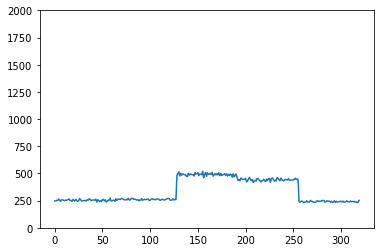

board: 2


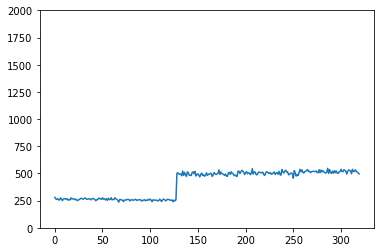

board: 3


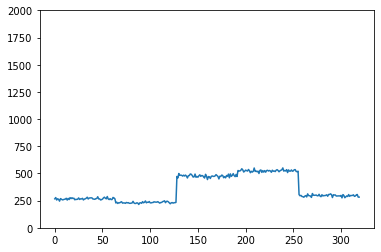

board: 4


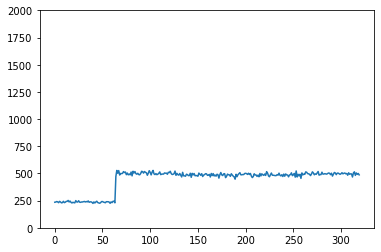

board: 5


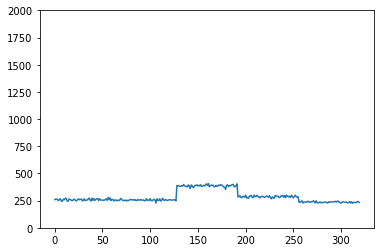

board: 6


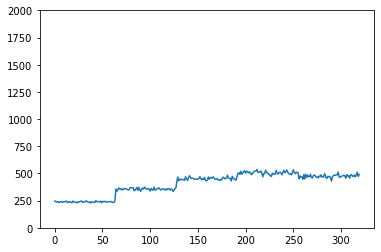

board: 7


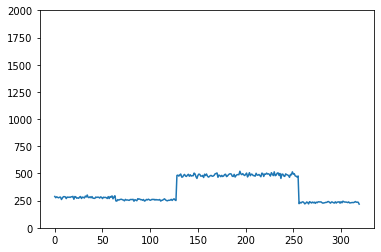

board: 8


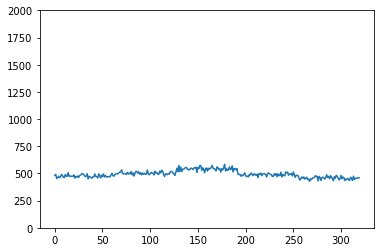

board: 9


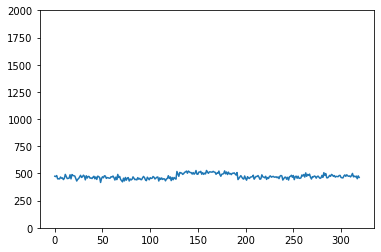

board: 10


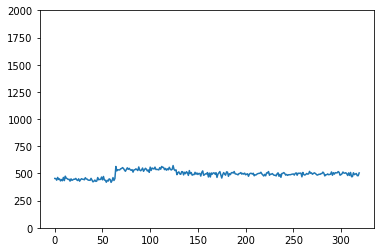

board: 11


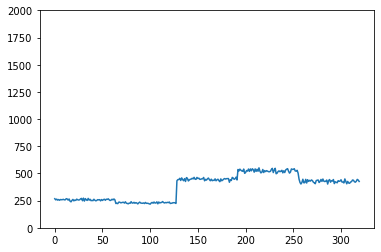

board: 12


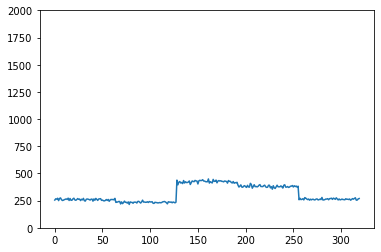

board: 13


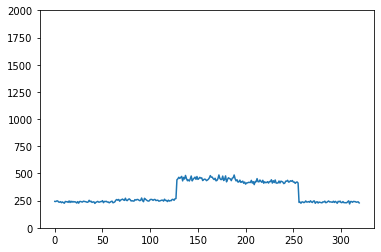

board: 14


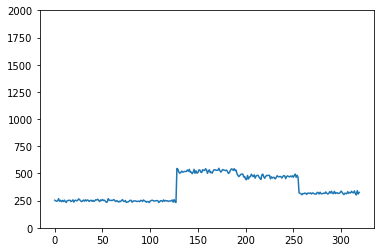

board: 15


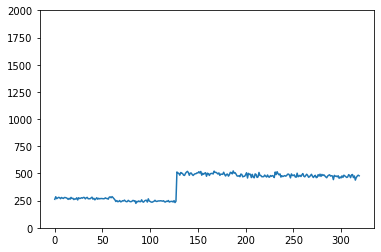

board: 16


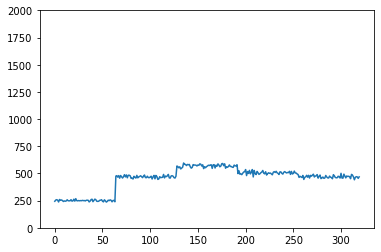

board: 17


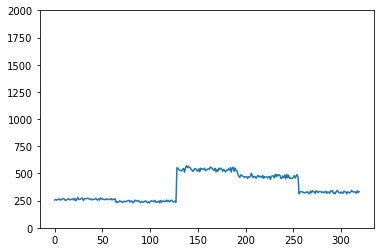

board: 18


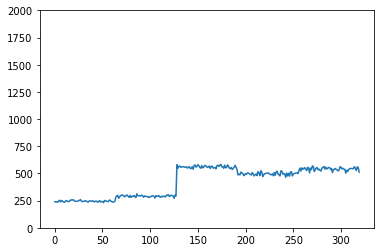

board: 19


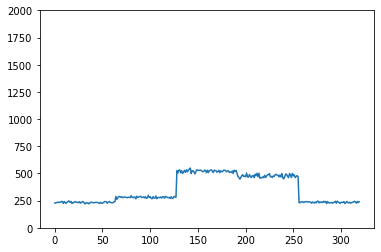

board: 20


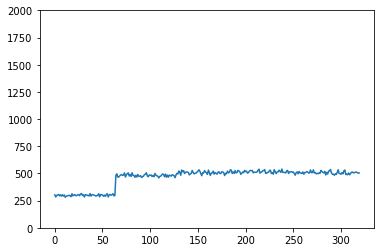

board: 22


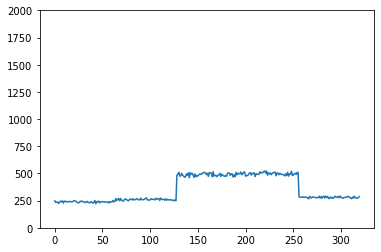

board: 23


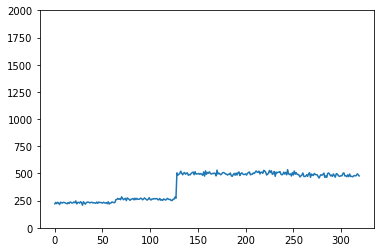

board: 24


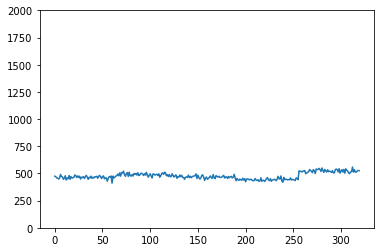

board: 25


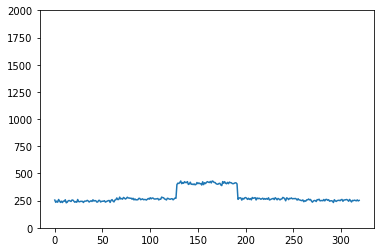

board: 26


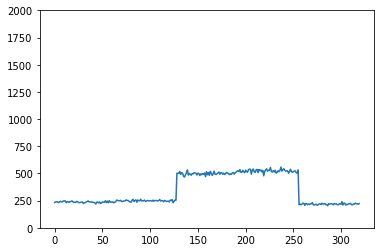

board: 27


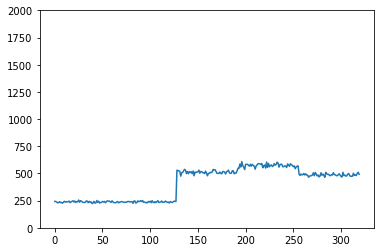

board: 28


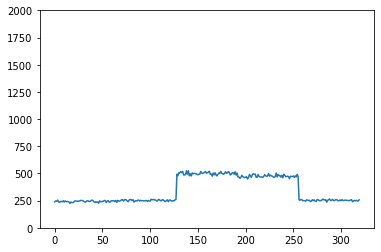

board: 29


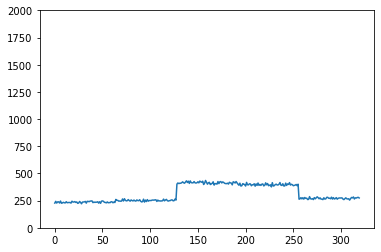

board: 30


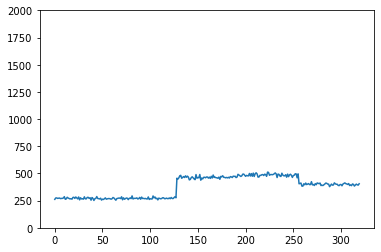

In [10]:
pedestal = np.zeros((31, 320))
for board in range(1, 31):
    if board in ped.active_boards:
        #for event in range(len(test_run.board_data(board))):
            #if np.any(test_run.board_data(board)[0]>= np.mean(test_run.board_data(board)[event])+200):
        print('board: {}'.format(board))
        pedestal[board]=np.mean(ped.board_data(board), axis=0)
        plt.plot(np.arange(320), pedestal[board])
        plt.ylim(0,2000)
        plt.show()

In [11]:
files

['../readmaroc/data/farm/Run000091294.dat']

In [12]:
test = MarocData(files[-1])

In [13]:
test.n_active_boards

29

board: 20, evt: 48, TS: 108424247


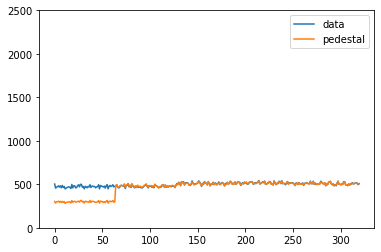

board: 20, evt: 601, TS: 1497997401


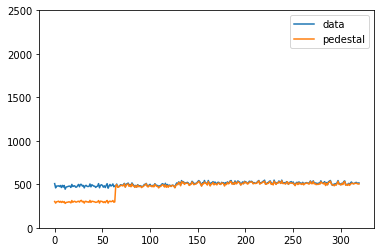

board: 20, evt: 650, TS: 1622739156


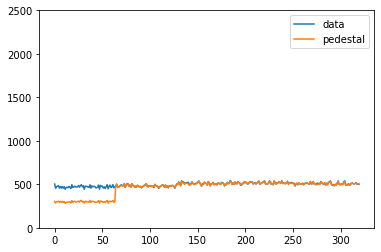

board: 20, evt: 982, TS: 2312644518


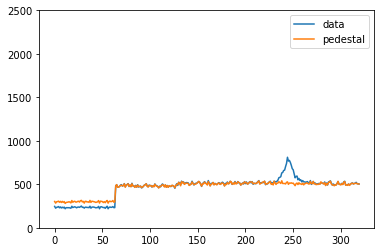

board: 23, evt: 48, TS: 104085579


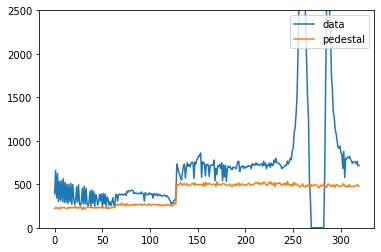

board: 23, evt: 61, TS: 132665681


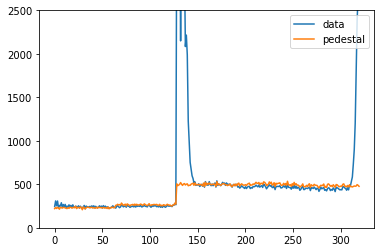

board: 23, evt: 125, TS: 283463316


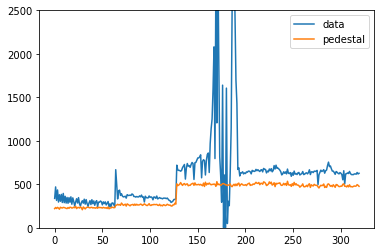

board: 23, evt: 158, TS: 345108211


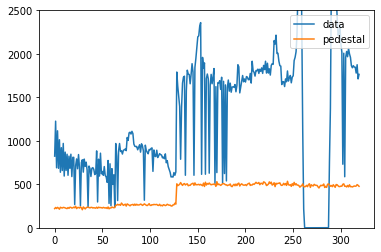

board: 23, evt: 211, TS: 515955054


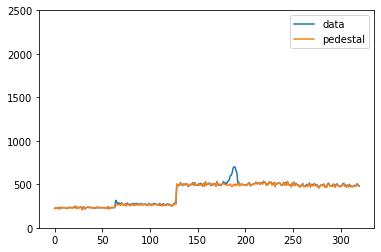

board: 23, evt: 276, TS: 659223924


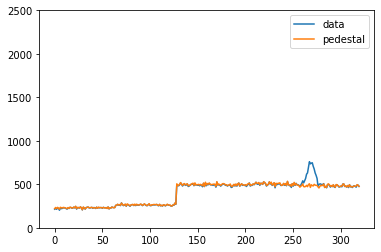

board: 23, evt: 309, TS: 744824671


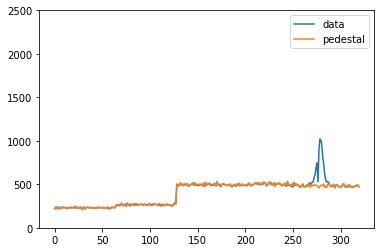

board: 23, evt: 441, TS: 1133247997


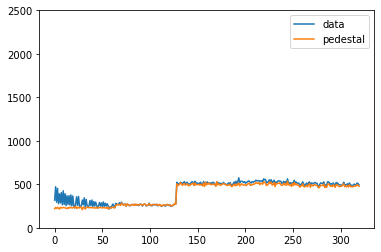

board: 23, evt: 468, TS: 1189944278


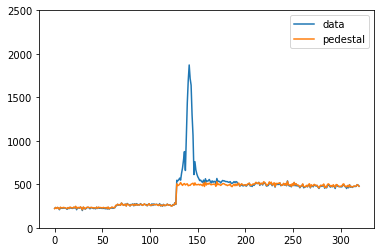

board: 23, evt: 541, TS: 1363327999


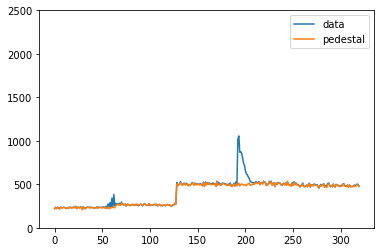

board: 23, evt: 666, TS: 1647181544


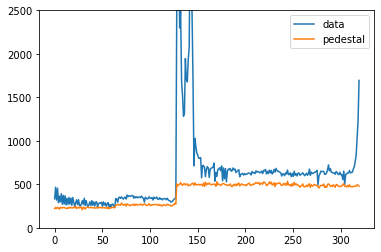

board: 23, evt: 788, TS: 1889764154


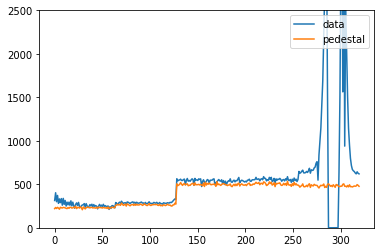

board: 23, evt: 805, TS: 1926269544


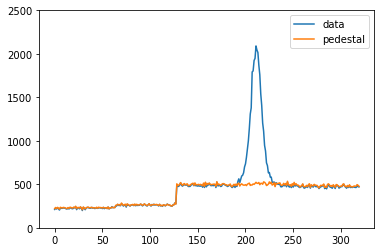

board: 23, evt: 859, TS: 2037603869


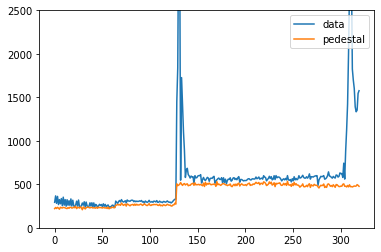

board: 23, evt: 1101, TS: 2591599568


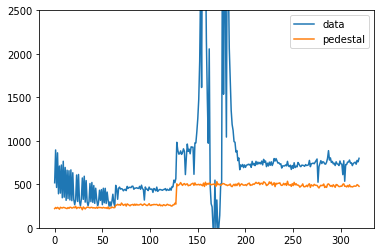

board: 23, evt: 1116, TS: 2646595399


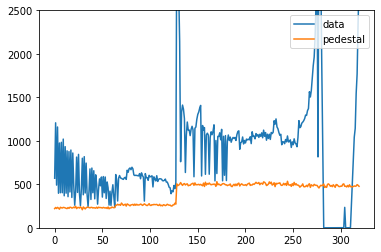

board: 23, evt: 1146, TS: 2712914737


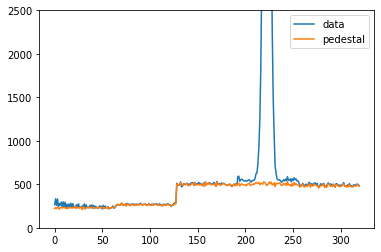

board: 26, evt: 117, TS: 259524223


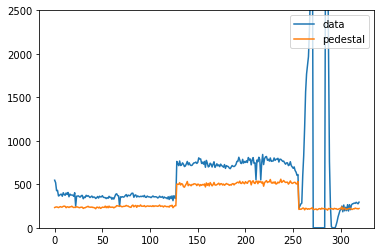

board: 26, evt: 150, TS: 326186657


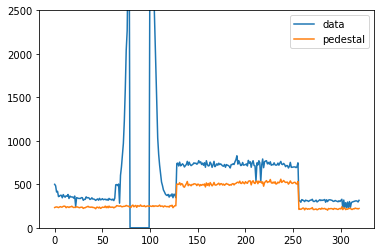

board: 26, evt: 199, TS: 480145023


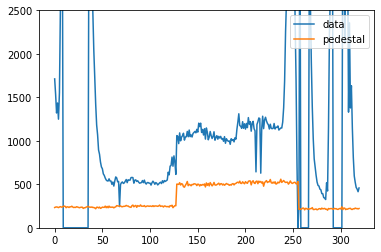

board: 26, evt: 268, TS: 640340062


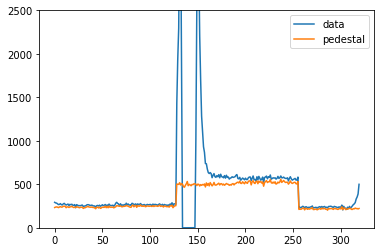

board: 26, evt: 365, TS: 933445446


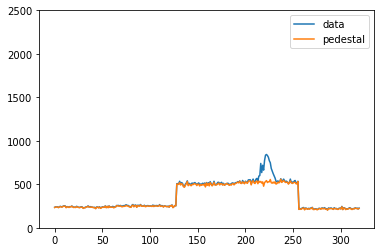

board: 26, evt: 608, TS: 1503226062


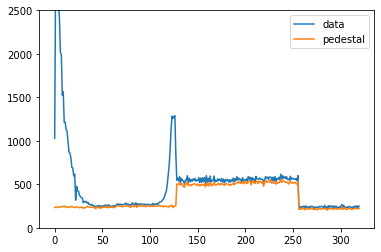

board: 26, evt: 784, TS: 1877818115


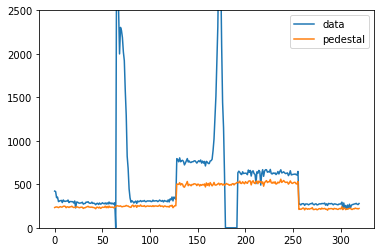

board: 26, evt: 859, TS: 2032921988


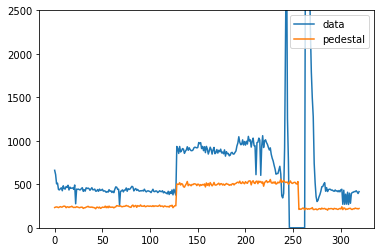

board: 26, evt: 892, TS: 2100012138


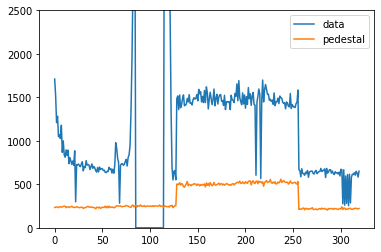

board: 26, evt: 932, TS: 2197465973


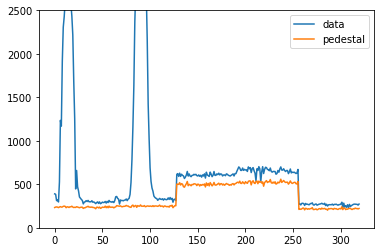

board: 26, evt: 1020, TS: 2410722419


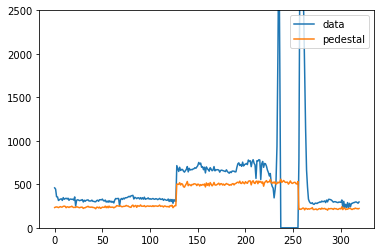

board: 29, evt: 0, TS: 3429645862


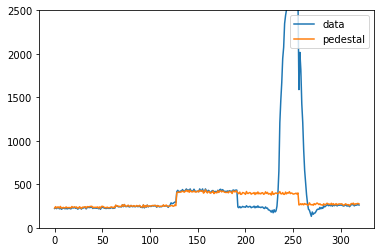

board: 29, evt: 199, TS: 475468075


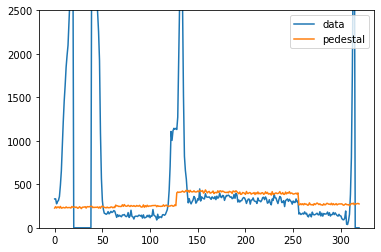

board: 29, evt: 308, TS: 734627470


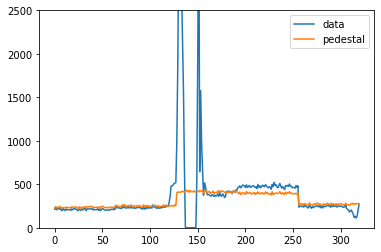

board: 29, evt: 327, TS: 798060464


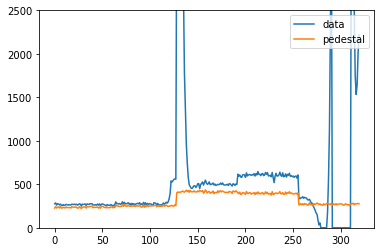

board: 29, evt: 436, TS: 1106296339


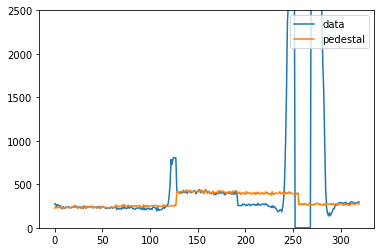

board: 29, evt: 583, TS: 1455997988


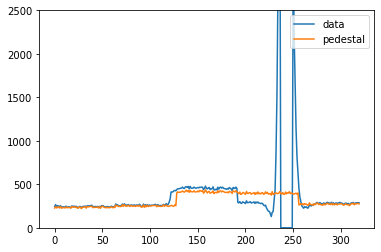

board: 29, evt: 852, TS: 2019456785


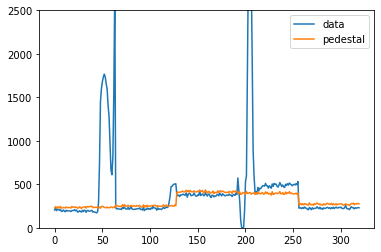

board: 29, evt: 884, TS: 2082568924


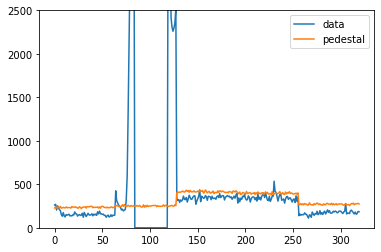

board: 29, evt: 903, TS: 2115831413


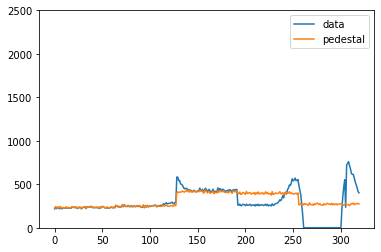

board: 29, evt: 932, TS: 2192789025


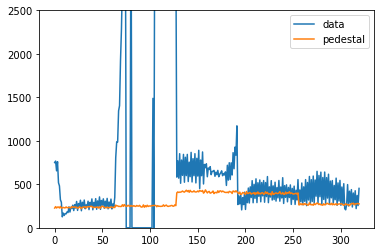

board: 29, evt: 1101, TS: 2582240739


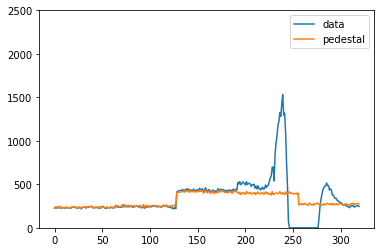

In [14]:
for b in [20, 23, 26, 29]:
    board = test.board_data(b)
    for evt in range(test.nevents_per_board(b)):
        if np.any(board[evt]-pedestal[b] > 200):
            plt.plot(np.arange(320), board[evt], label='data')
            plt.plot(np.arange(320), pedestal[b], label='pedestal')
            print('board: {}, evt: {}, TS: {}'.format(b, evt, test.header_board(b)[evt][2]))
            plt.ylim(0,2500)
            plt.legend(loc='upper right')
            plt.show()

In [18]:
from scipy.stats import norm

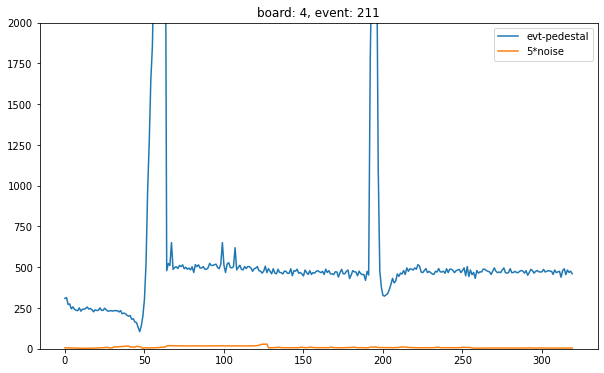

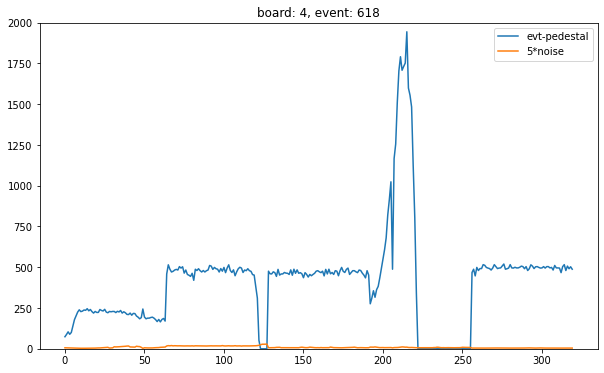

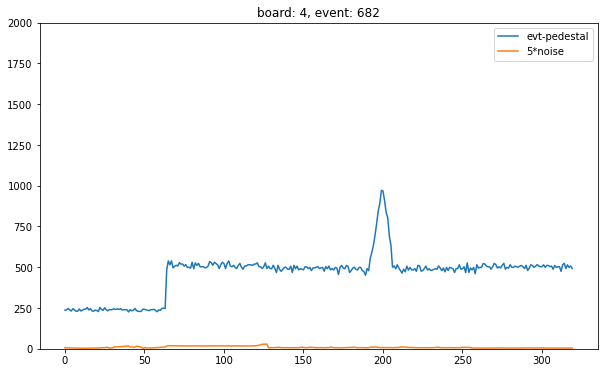

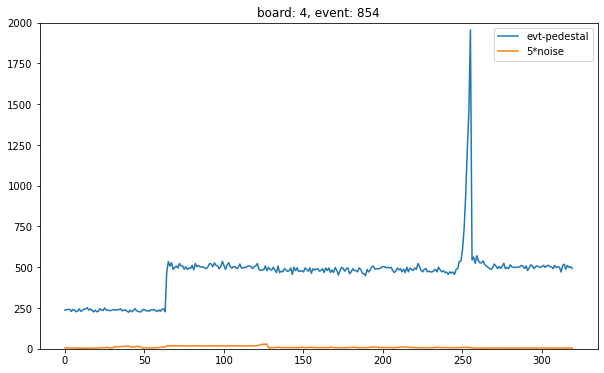

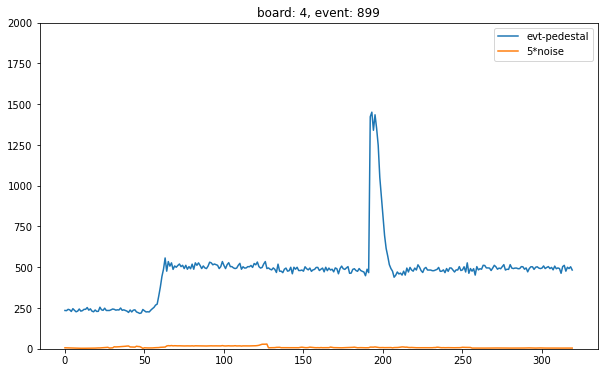

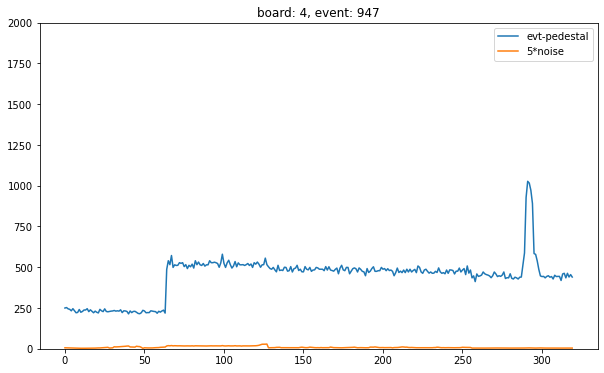

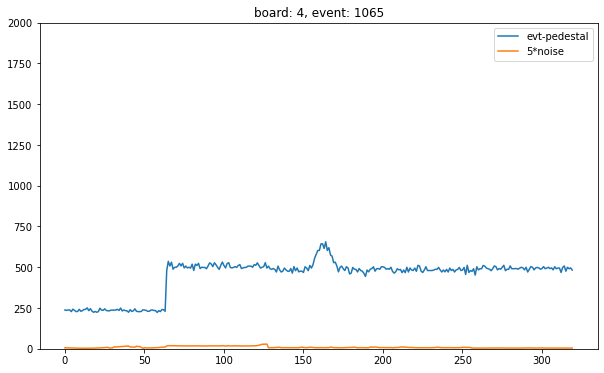

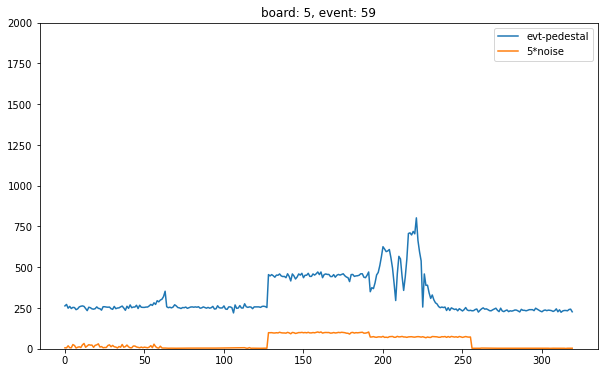

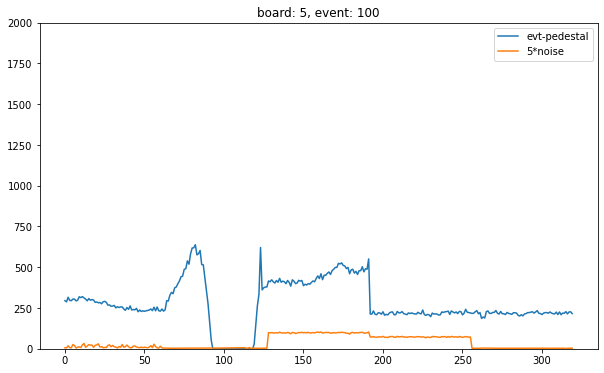

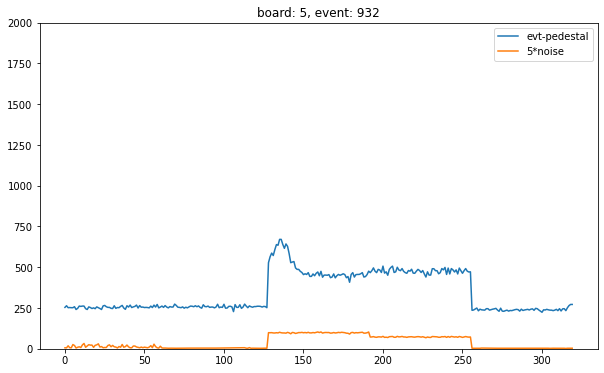

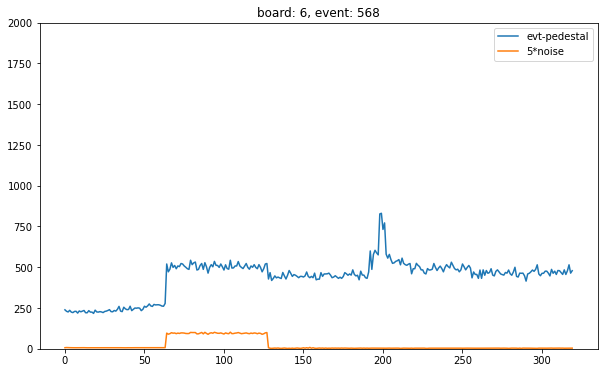

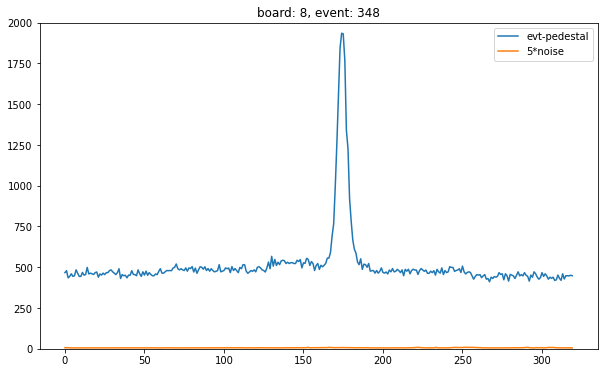

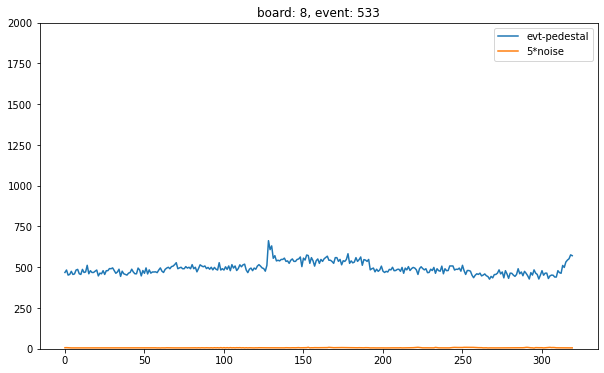

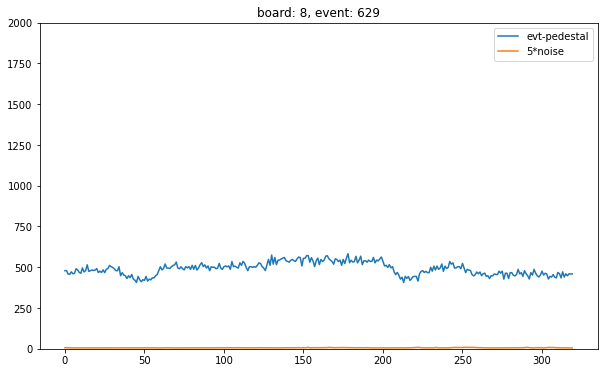

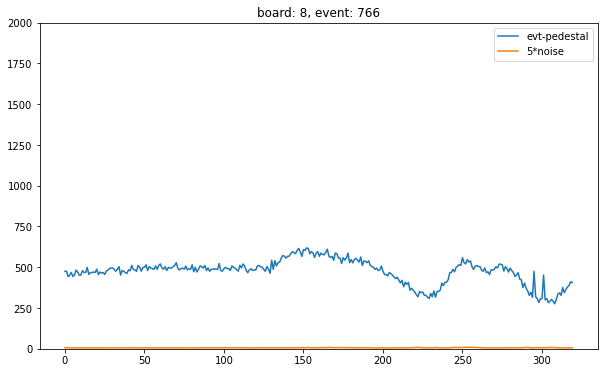

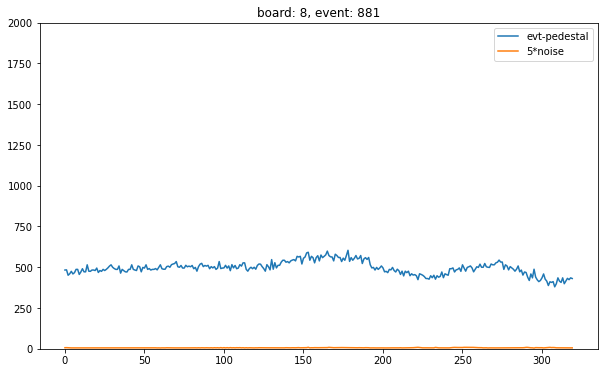

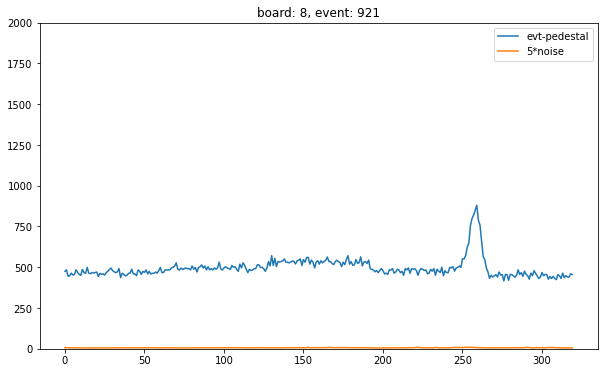

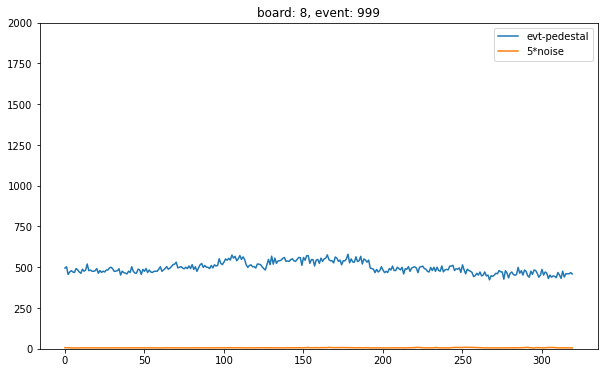

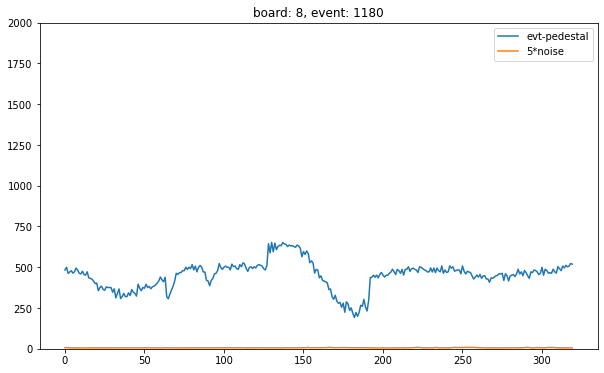

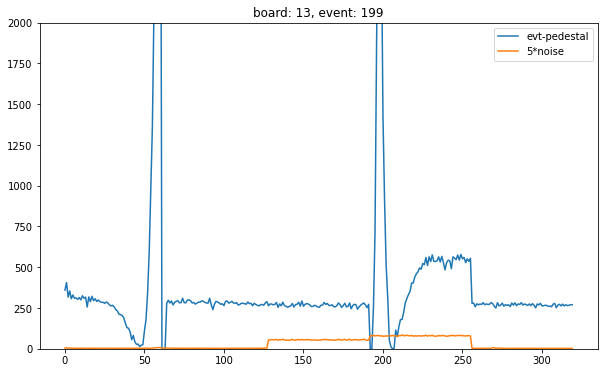

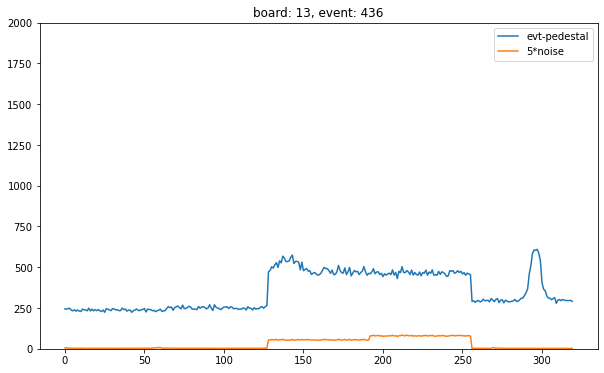

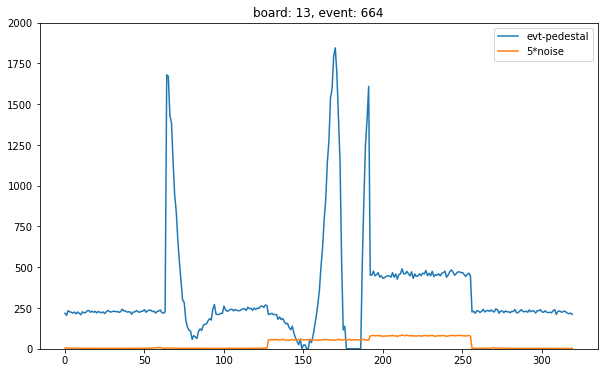

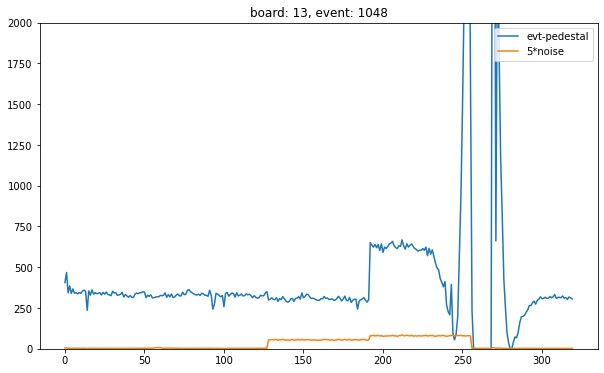

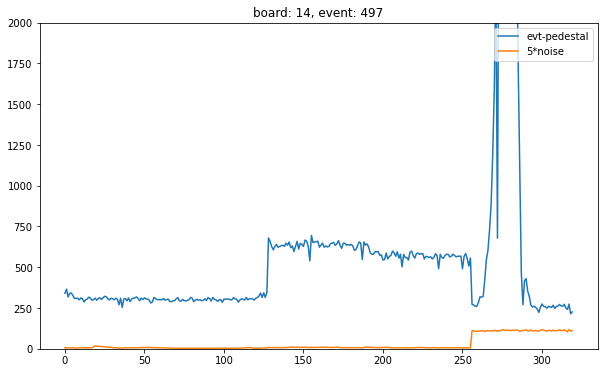

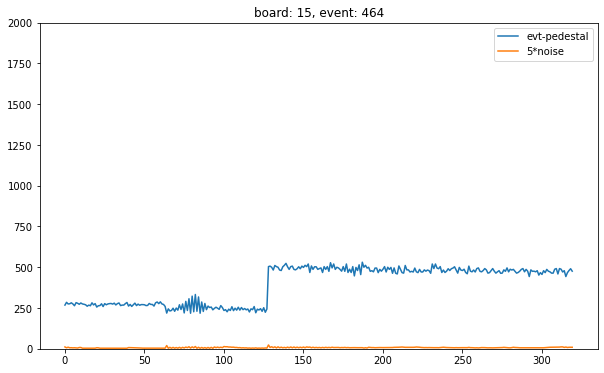

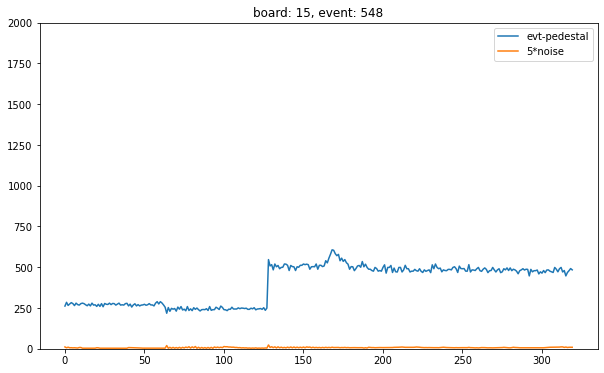

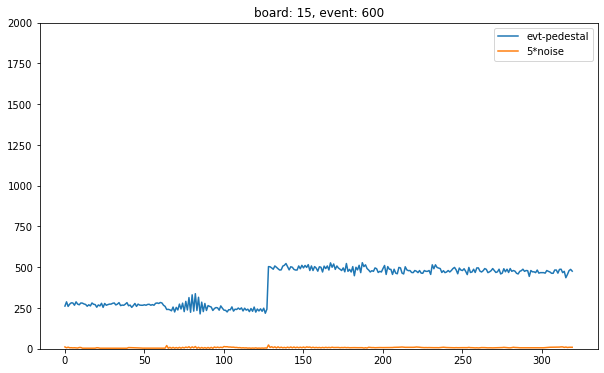

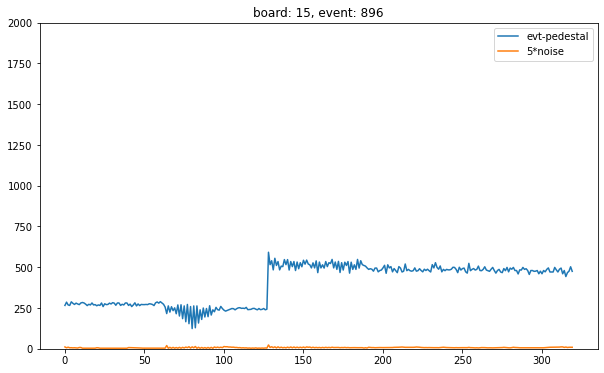

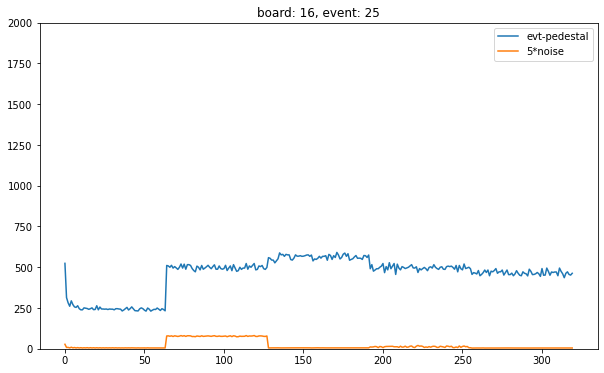

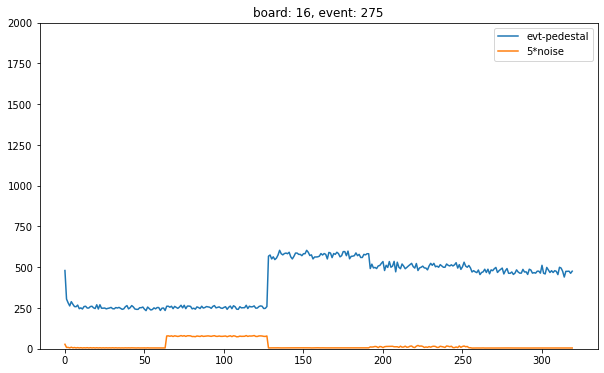

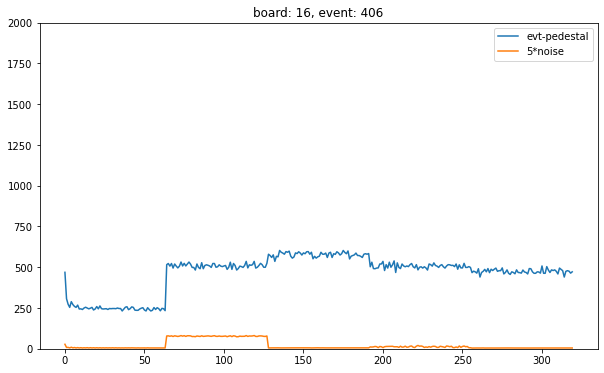

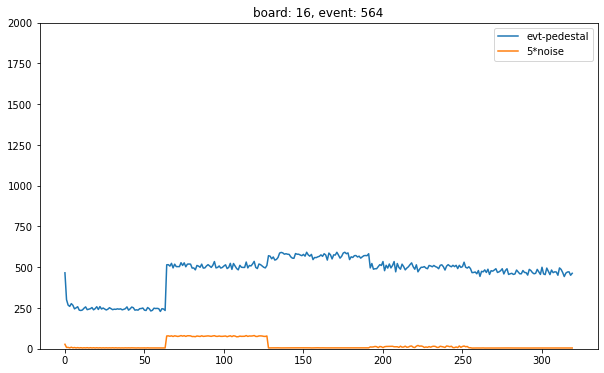

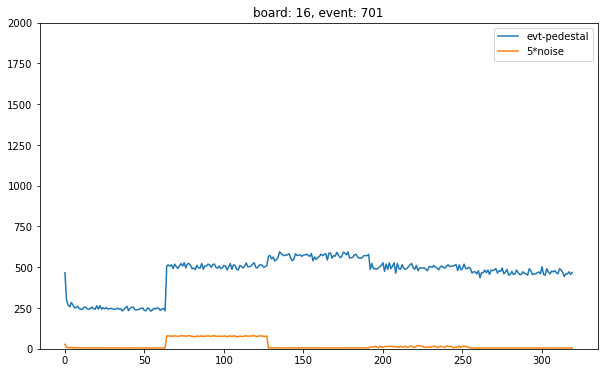

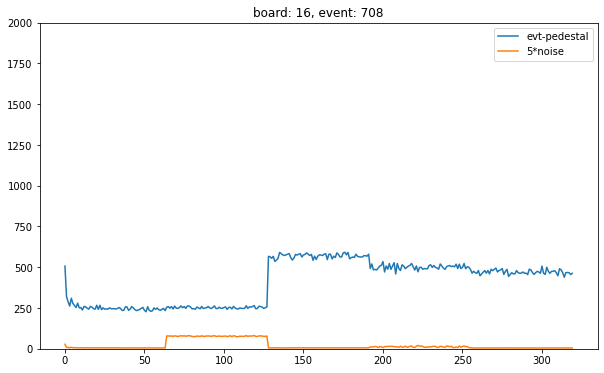

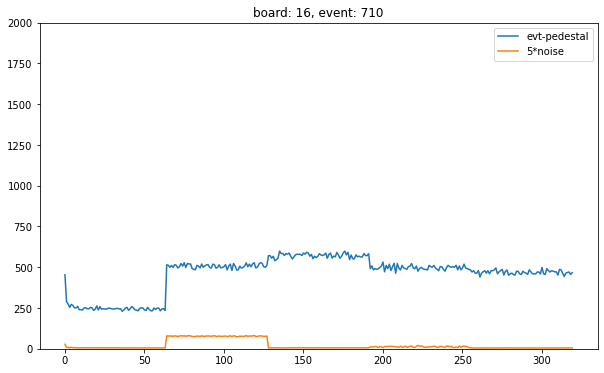

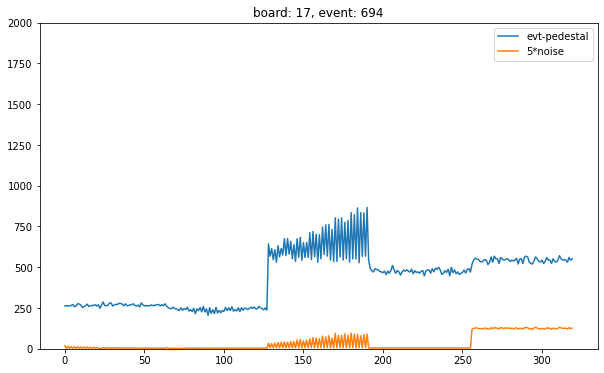

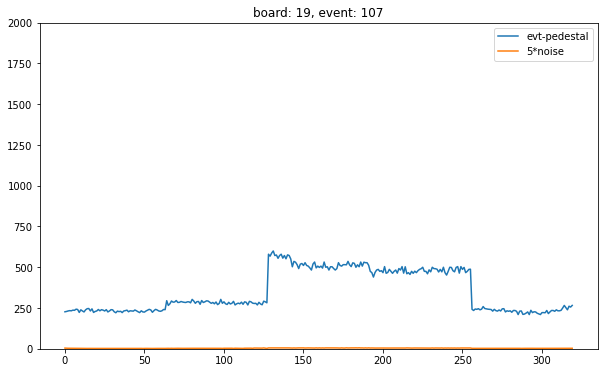

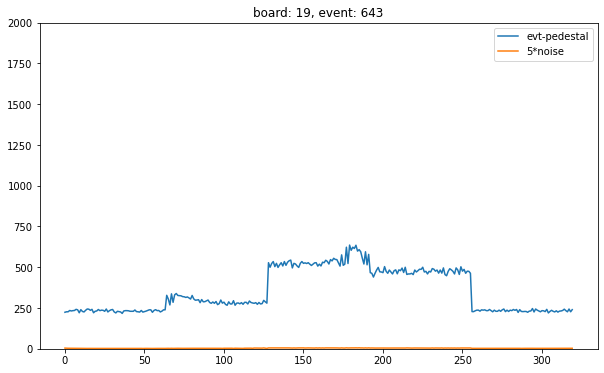

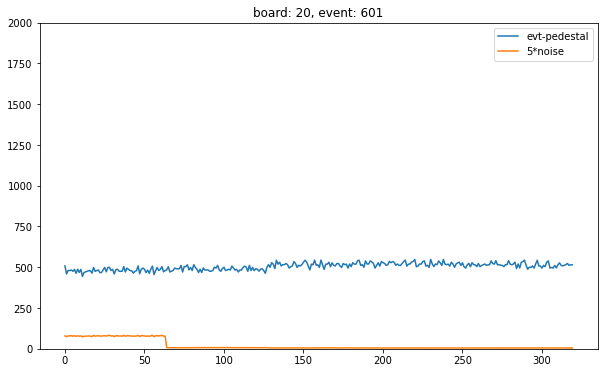

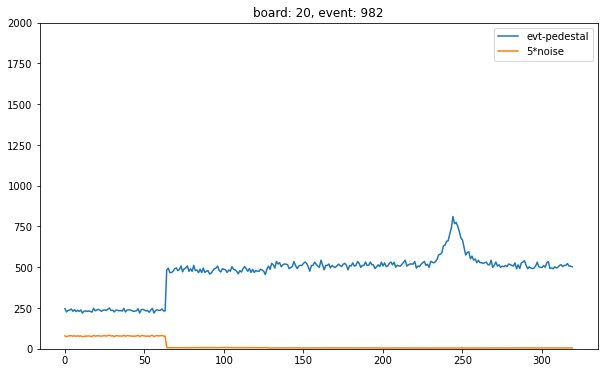

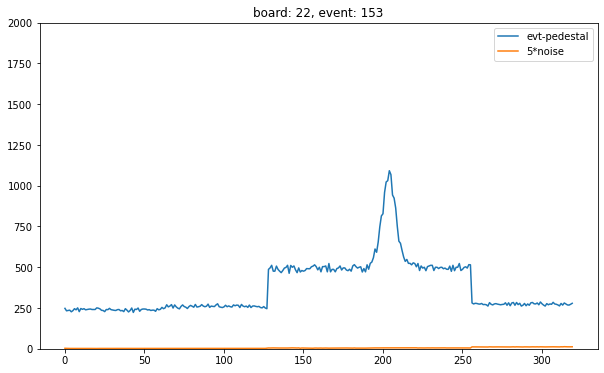

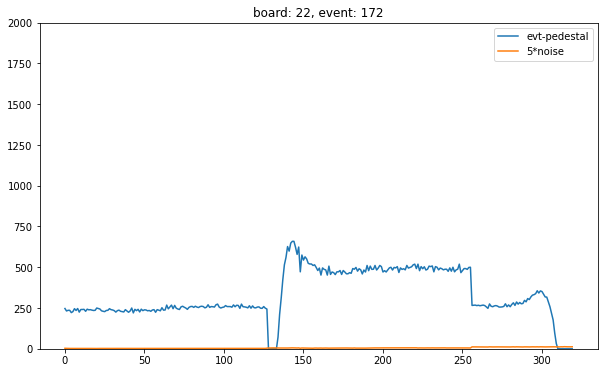

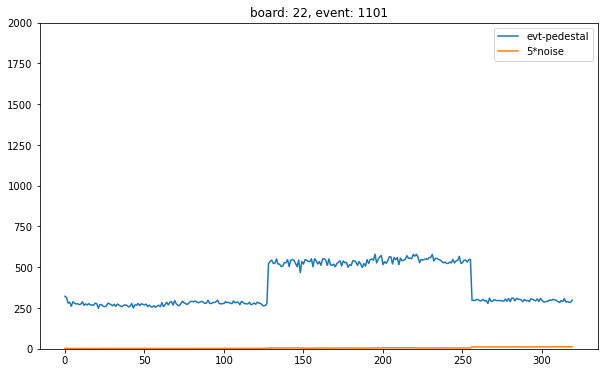

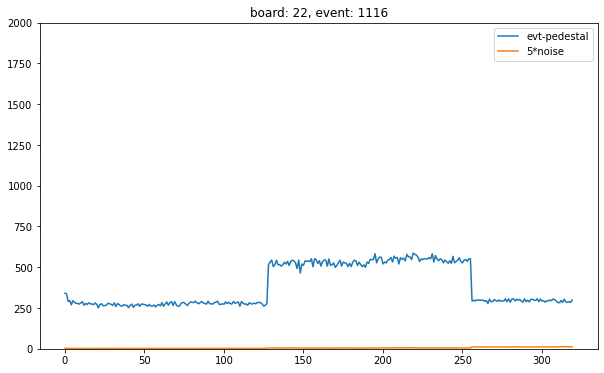

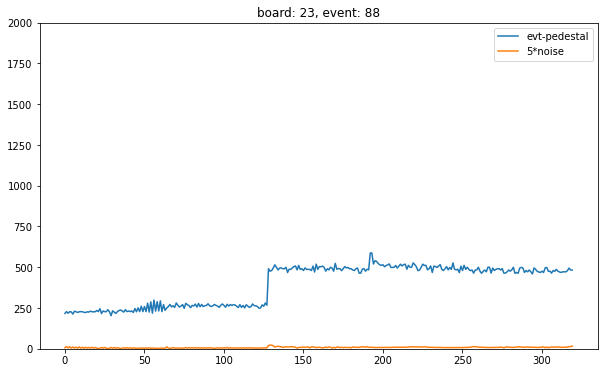

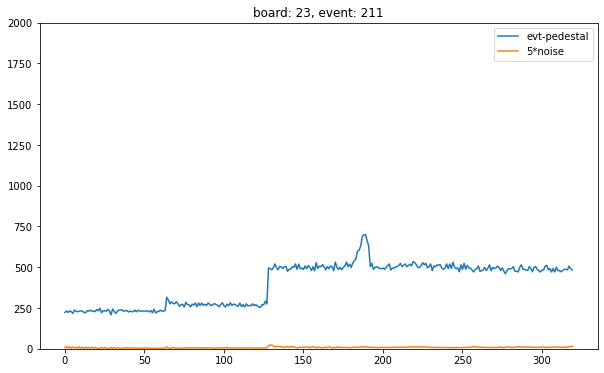

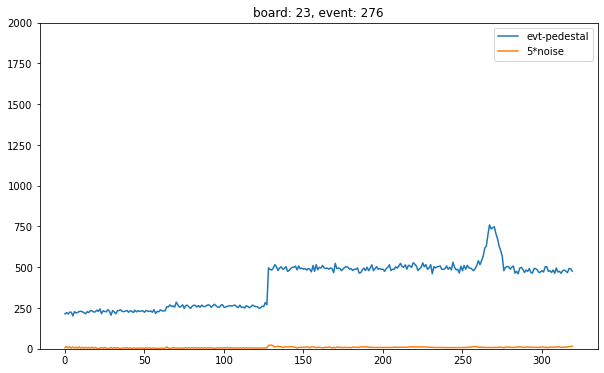

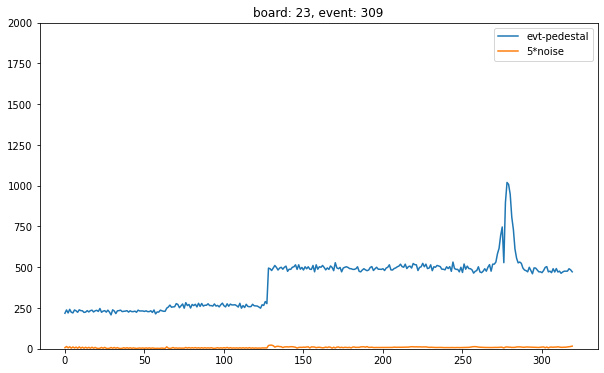

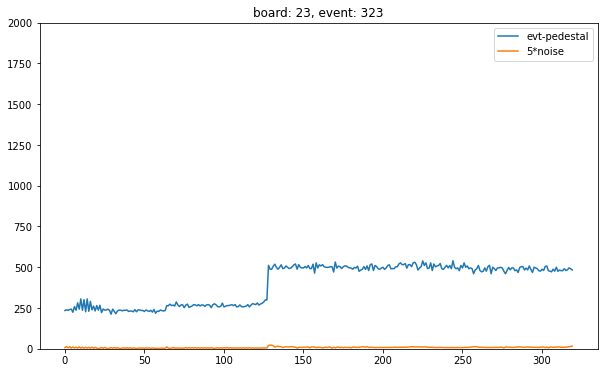

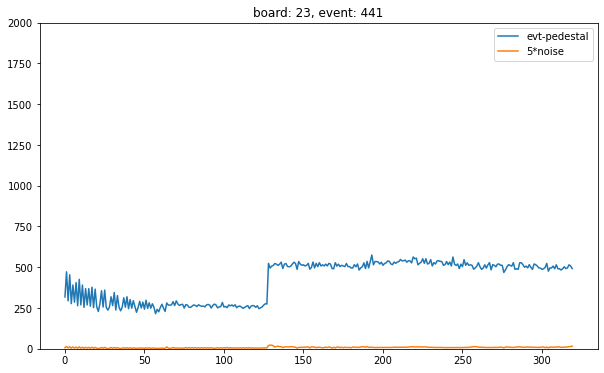

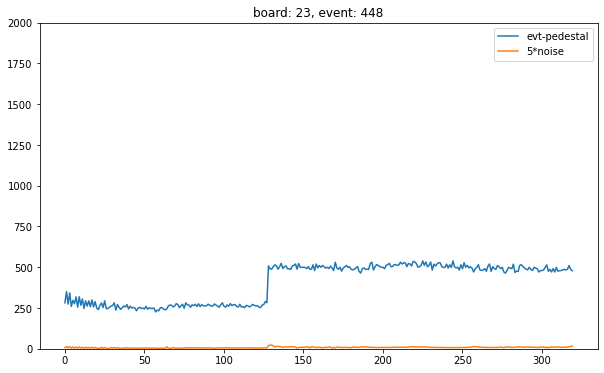

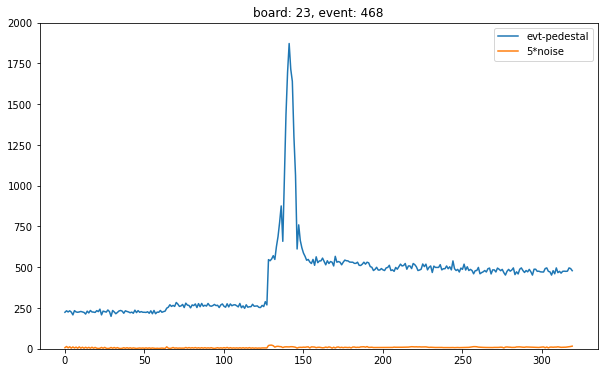

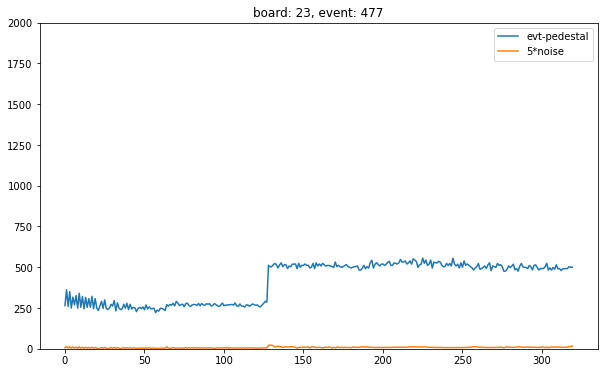

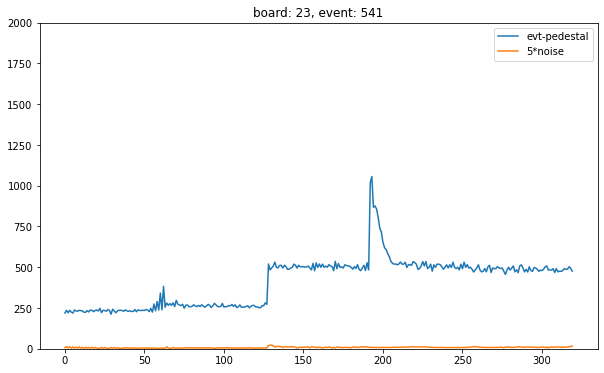

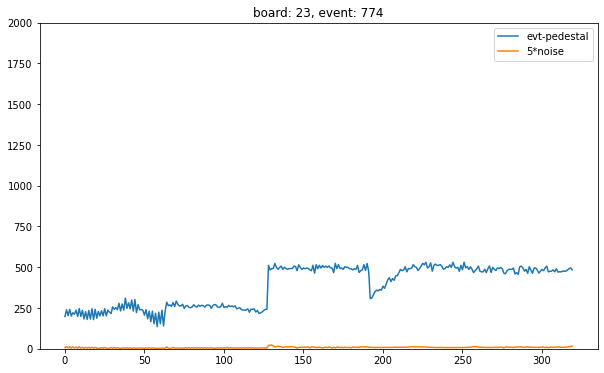

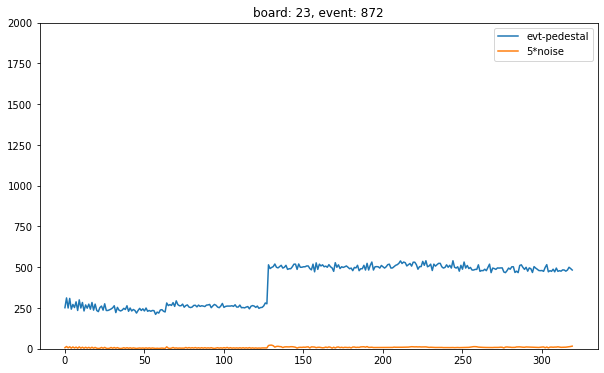

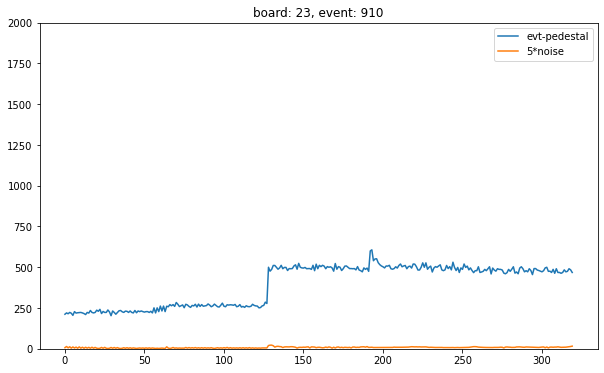

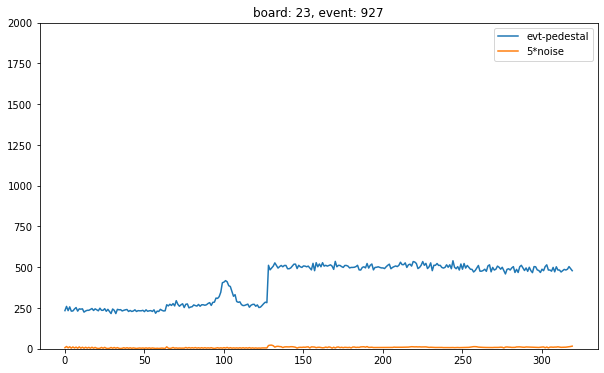

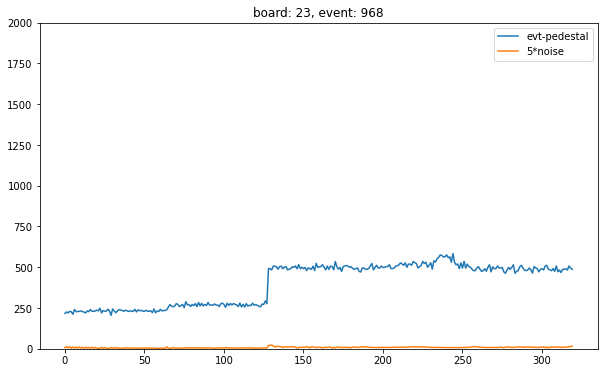

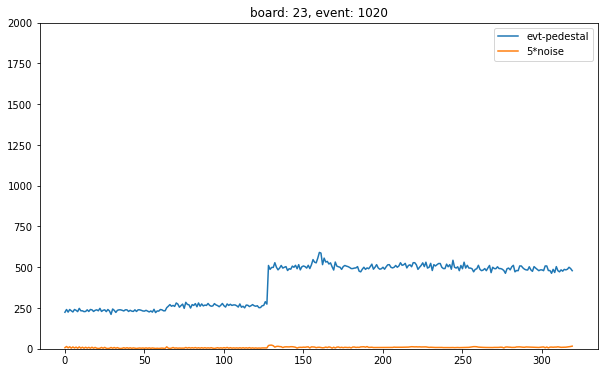

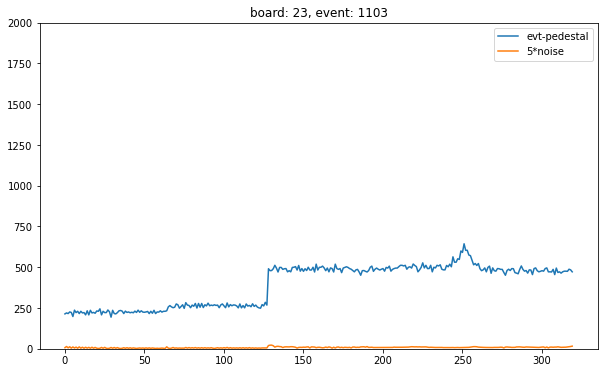

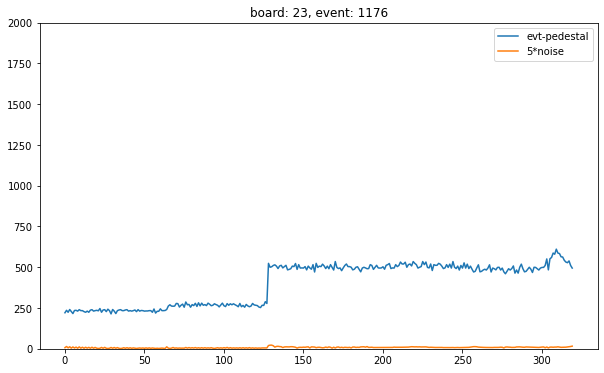

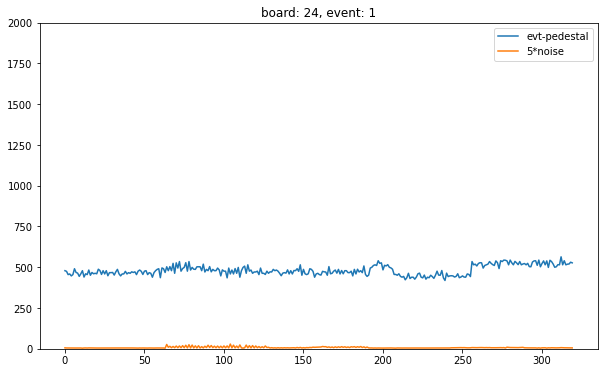

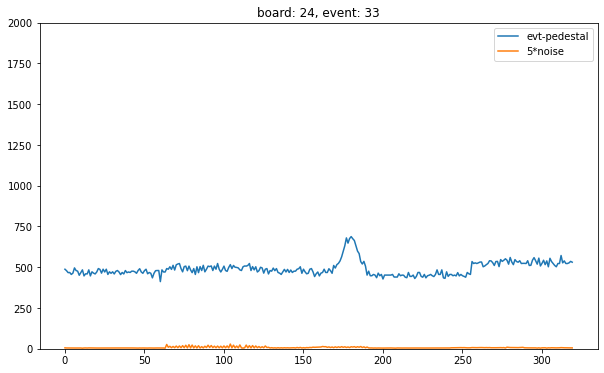

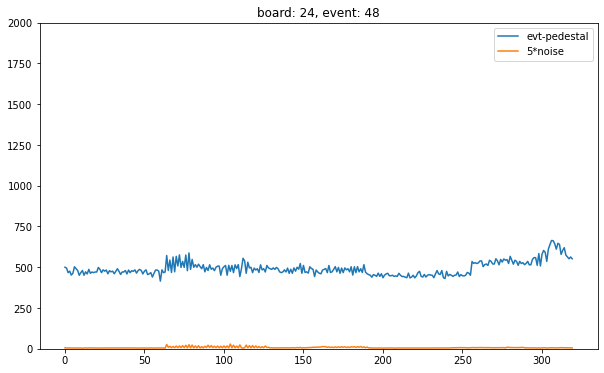

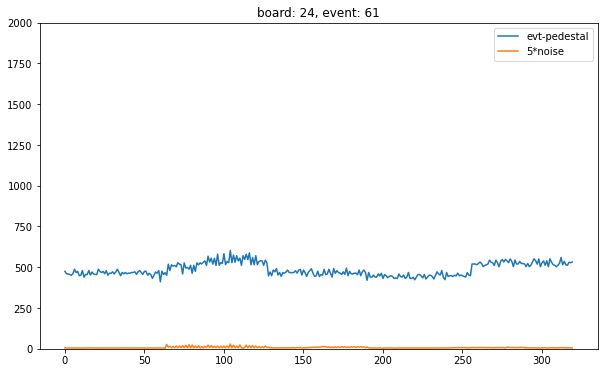

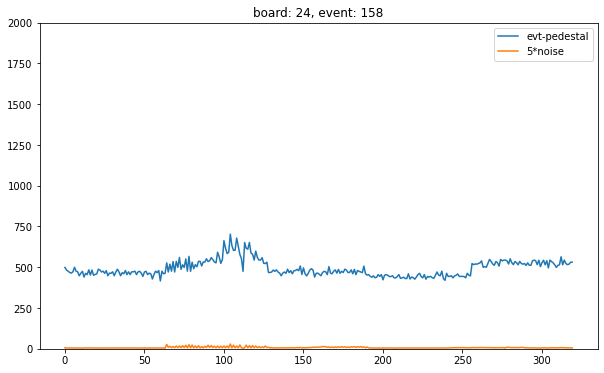

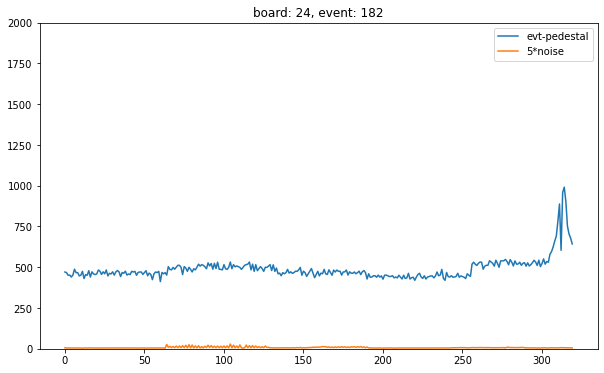

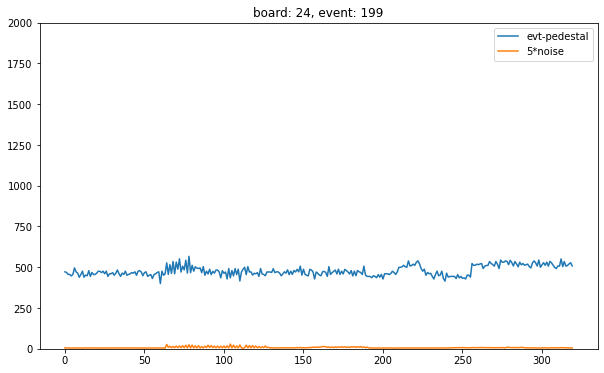

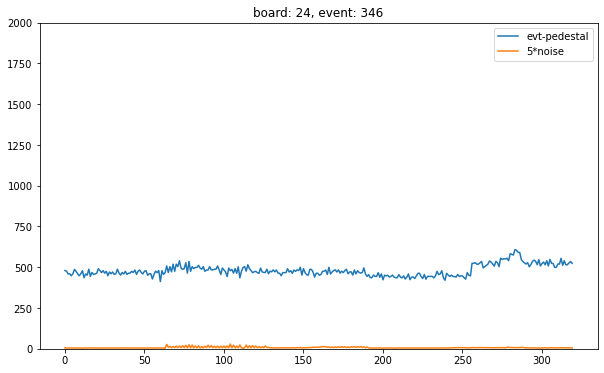

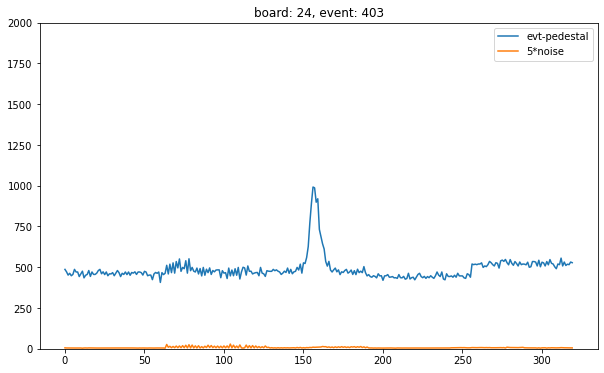

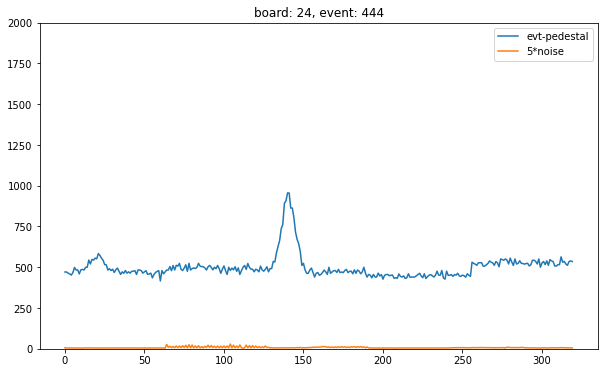

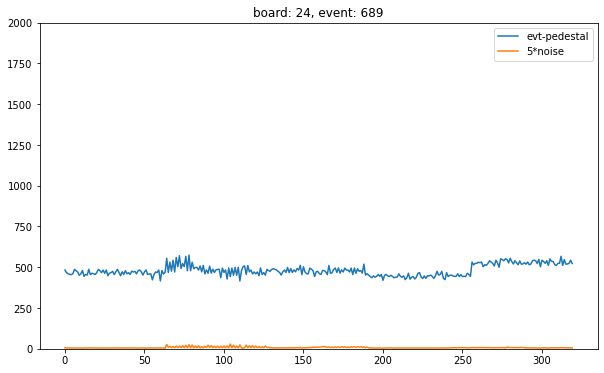

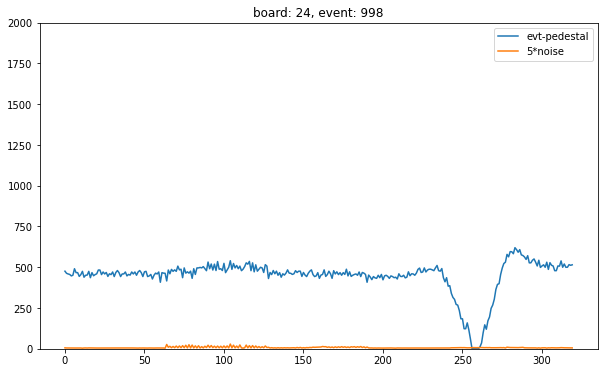

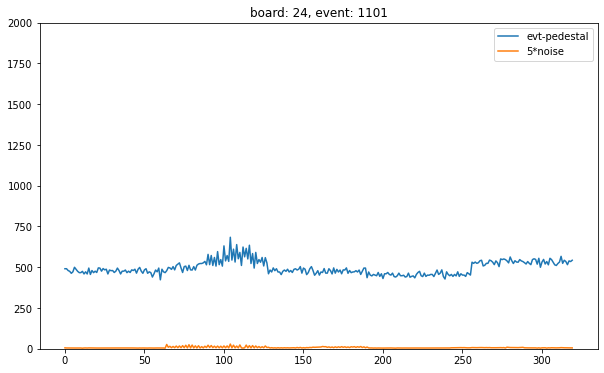

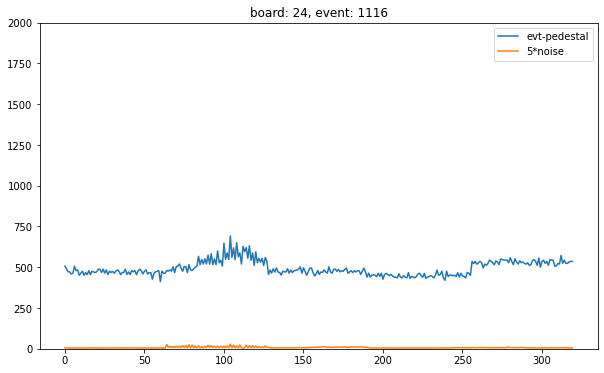

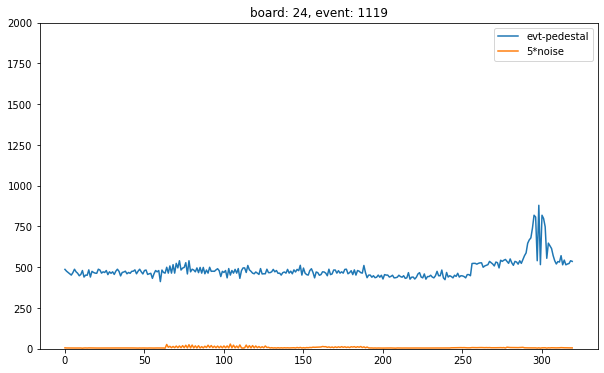

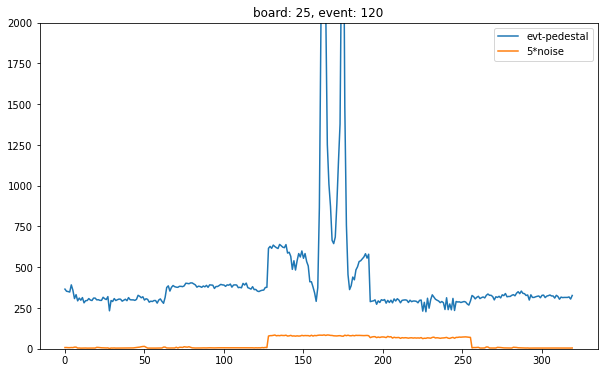

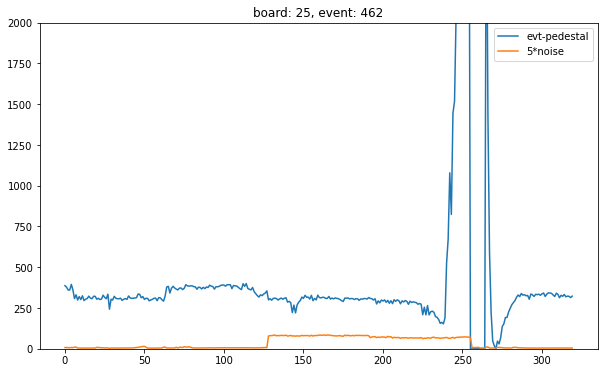

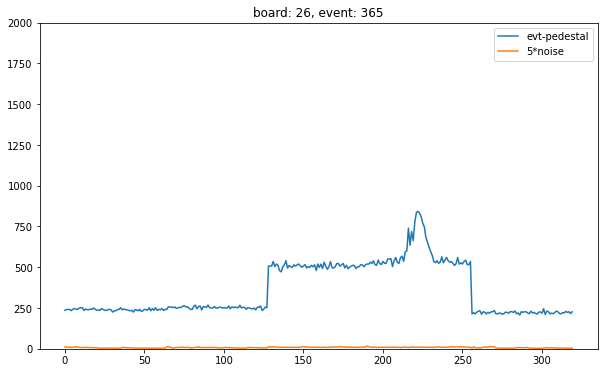

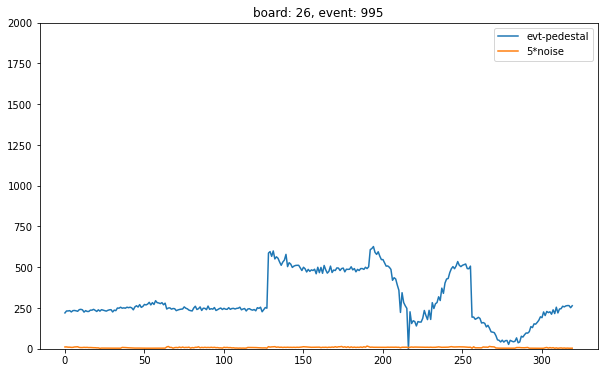

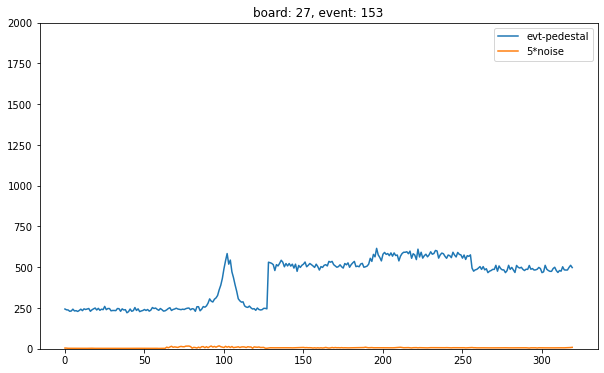

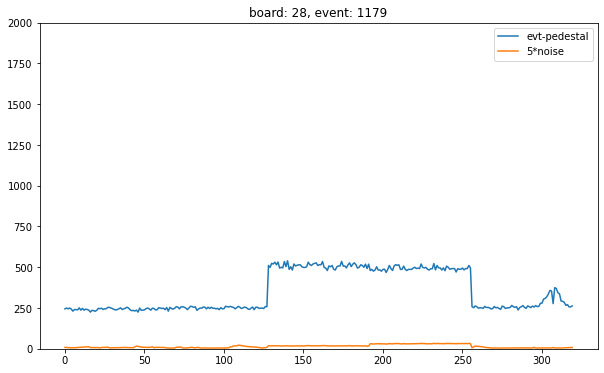

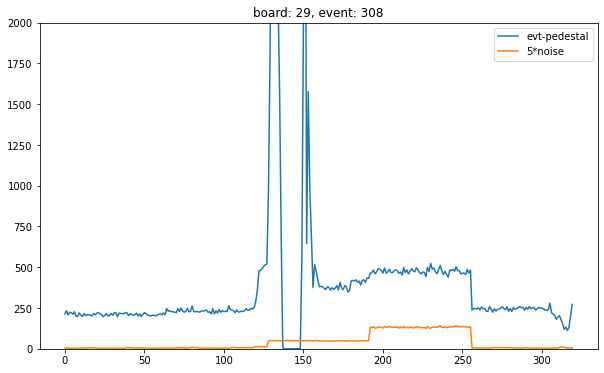

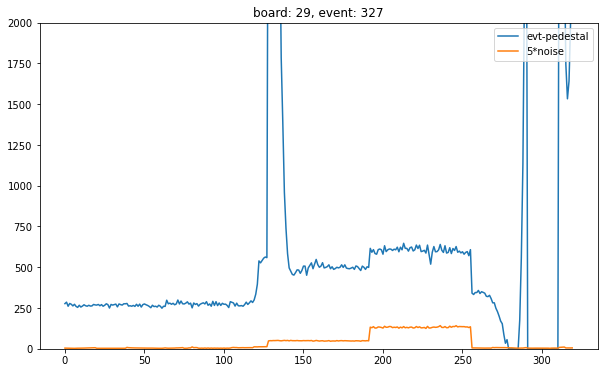

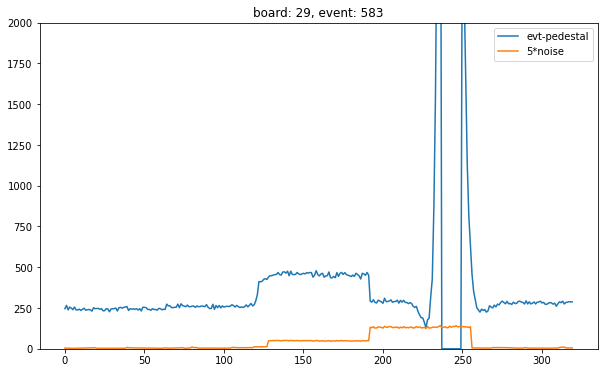

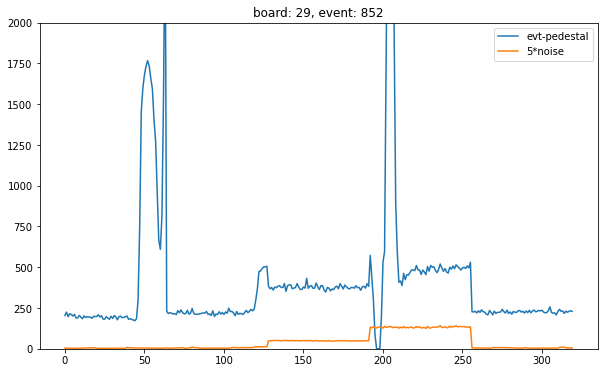

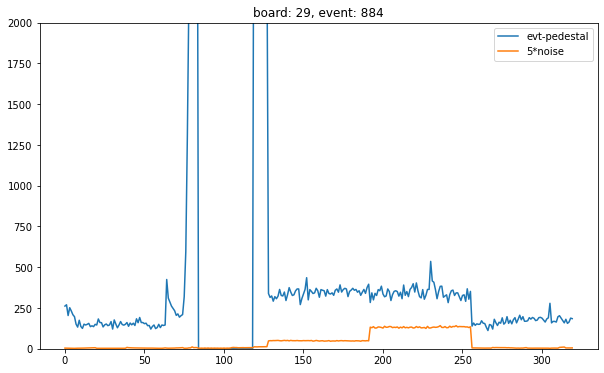

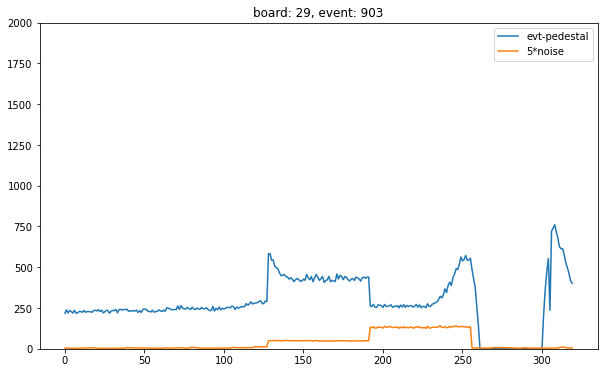

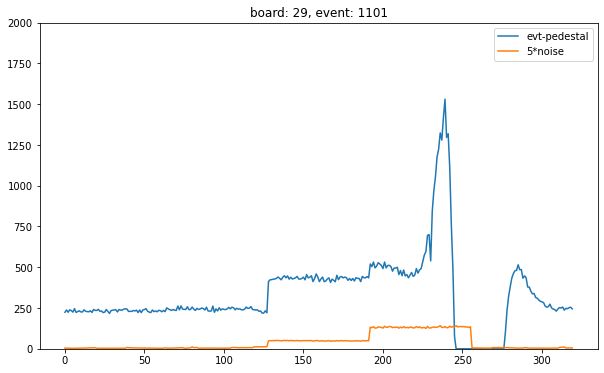

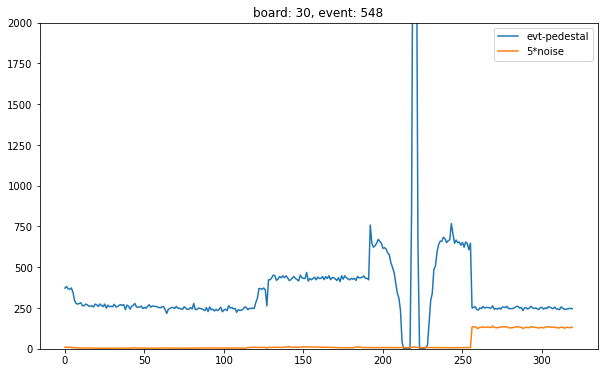

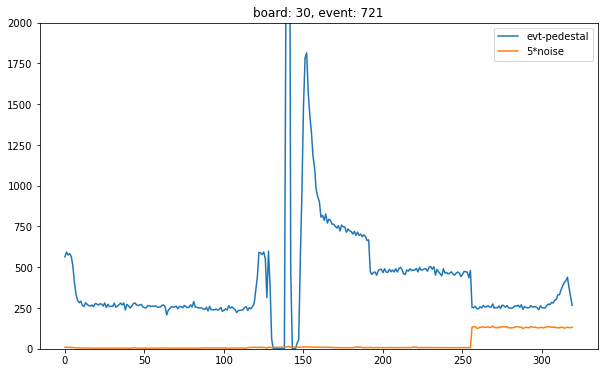

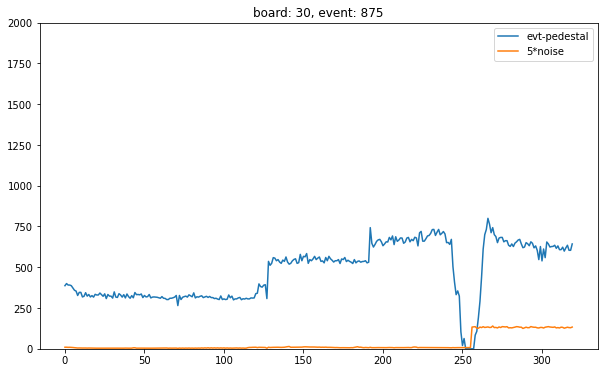

In [28]:
for b in test.active_boards:
    strips=np.arange(320)
    board_data = test.board_data(b)
    noise = test._noise(b)
    mu, std = norm.fit(noise)
    avg = test._avg_data(b)
    #print(mu, std, mu+5*std, mu+5*std*mu,np.mean(avg))
    for i, evt in enumerate(board_data): 
        if np.any(evt-avg>50+(mu+5*std)) and np.where(evt-avg>50+(mu+5*std))[0].shape[0]<25 :
            plt.figure(figsize=(10,6))
            plt.title('board: {}, event: {}'.format(b,i))
            plt.plot(strips, evt, label='evt-pedestal')
            plt.plot(strips, noise, label='5*noise')
            plt.ylim(0,2000)
            plt.legend(loc='upper right')
            plt.show()


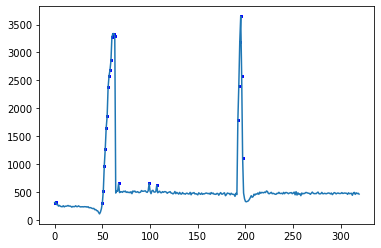

In [62]:
board_data = test.board_data(4)
event = board_data[211]
noise = test._noise(4)
mu, std = norm.fit(noise)
avg = test._avg_data(4)

count=0
plt.plot(strips, event)
for i, strip in enumerate(event):
    if (strip-avg[i])>mu+5*std and (strip-avg[i+1])>mu+5*std:    
        plt.scatter(strips[i], event[i], s=2, marker='s',c='blue')
        count+=1
        
    else:
        count=0
plt.show()

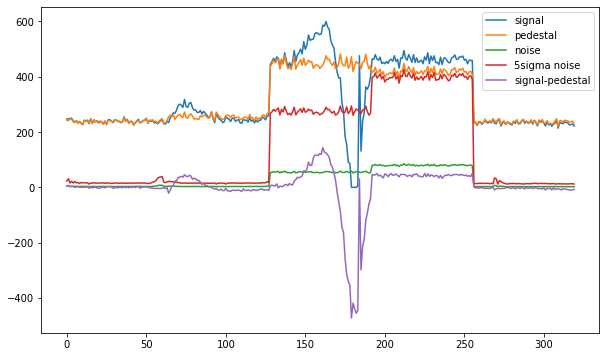

In [82]:
plt.figure(figsize=(10,6))
plt.plot(strips,board_data[101], label='signal')
plt.plot(strips, avg, label='pedestal')
plt.plot(strips, noise, label='noise')
plt.plot(strips, 5*noise, label='5sigma noise')
plt.plot(strips, board_data[101]-avg, label='signal-pedestal')
#plt.ylim(0,2000)
plt.legend()
plt.show()

In [85]:
from scipy.stats import norm
mu, std = norm.fit(noise)

In [86]:
std

32.49084231242419

In [88]:
mu+5*std

191.3512539139805

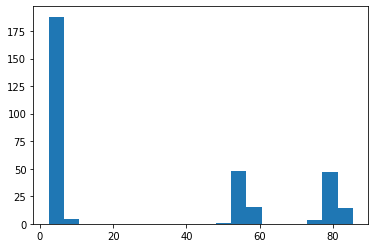

In [84]:
ma
plt.hist(noise, bins=20)
plt.show()

In [ ]:
plt.plot(np.arange(320), ag)

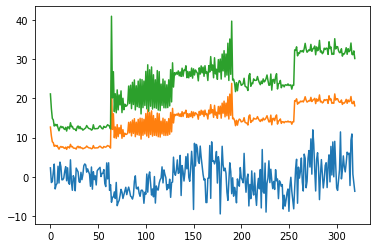

In [34]:
#plt.plot(np.arange(320), test.board_data(2)[0])
#plt.plot(np.arange(320), pedestal[2])
plt.plot(np.arange(320), test.board_data(2)[0]-pedestal[2])
plt.plot(np.arange(320), test._noise(2)*3)
plt.plot(np.arange(320), test._noise(2)*5)
plt.show()

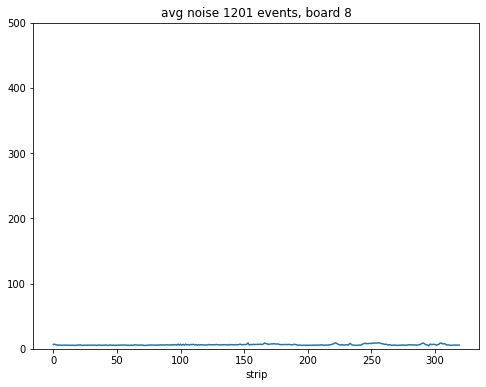

In [24]:
test.plot_noise(8)

In [26]:
test._noise(8).shape

(320,)

board: 5, evt: 7, TS: 57250160


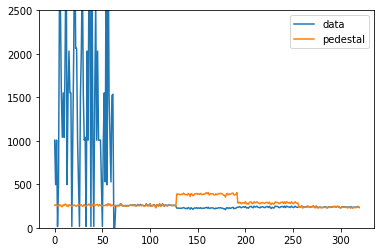

board: 5, evt: 59, TS: 158614067


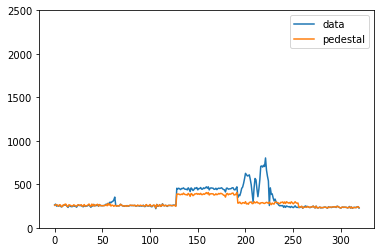

board: 5, evt: 100, TS: 246437293


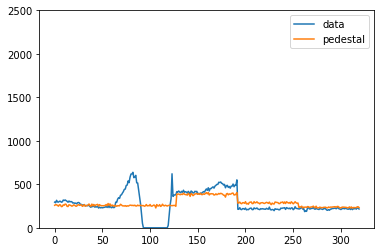

board: 5, evt: 263, TS: 654539544


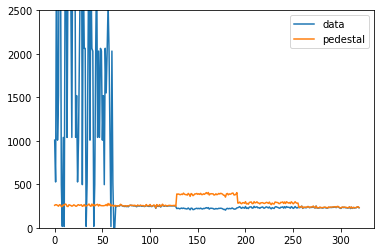

board: 5, evt: 519, TS: 1328157631


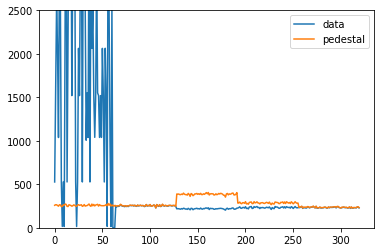

board: 5, evt: 775, TS: 1897147220


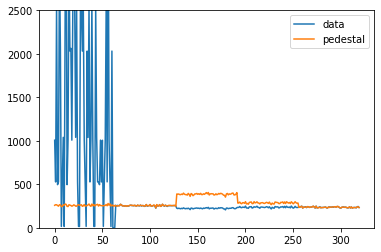

board: 5, evt: 876, TS: 2104123751


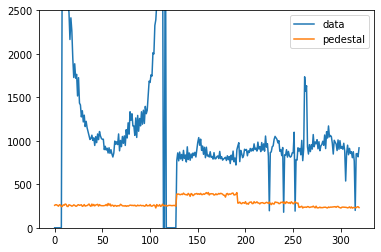

board: 5, evt: 1031, TS: 2465629391


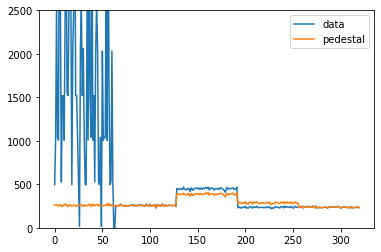

board: 8, evt: 249, TS: 628109062


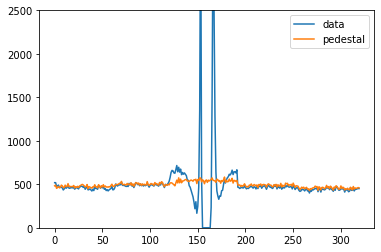

board: 8, evt: 348, TS: 899931645


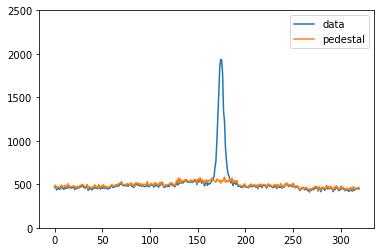

board: 8, evt: 499, TS: 1288707417


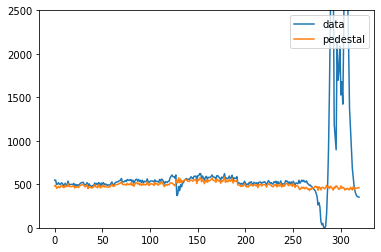

board: 8, evt: 921, TS: 2192723462


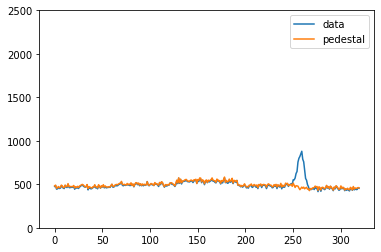

board: 8, evt: 1191, TS: 2818734872


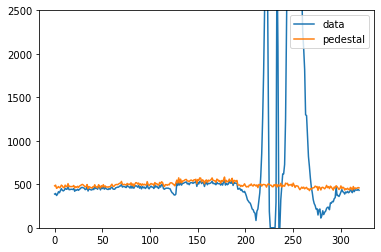

board: 14, evt: 199, TS: 498871240


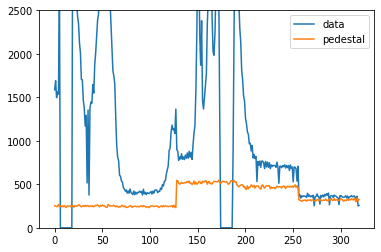

board: 14, evt: 289, TS: 709683920


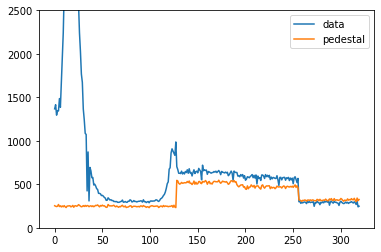

board: 14, evt: 497, TS: 1275694650


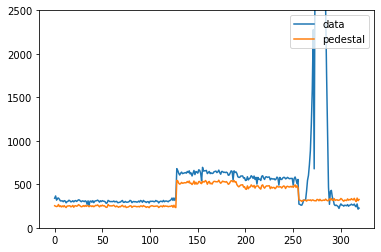

board: 14, evt: 932, TS: 2216192190


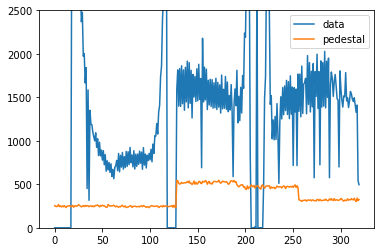

board: 14, evt: 1072, TS: 2538107936


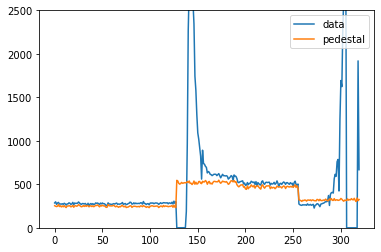

In [16]:
for b in [2, 5, 8, 11, 14]:
    board = test.board_data(b)
    for evt in range(test.nevents_per_board(b)):
        if np.any(board[evt]-pedestal[b] > 300):
            plt.plot(np.arange(320), board[evt], label='data')
            plt.plot(np.arange(320), pedestal[b], label='pedestal')
            print('board: {}, evt: {}, TS: {}'.format(b, evt, test.header_board(b)[evt][2]))
            plt.ylim(0,2500)
            plt.legend(loc='upper right')
            plt.show()

board: 6, evt: 568, TS: 1472307123


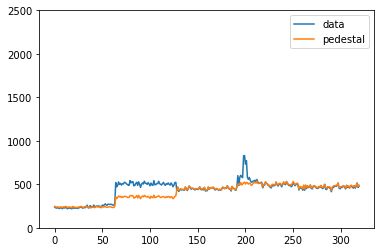

board: 12, evt: 932, TS: 2219276229


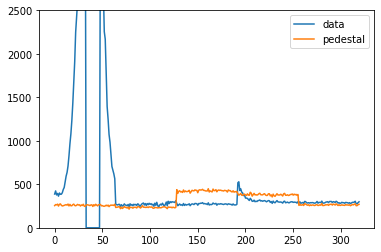

board: 15, evt: 199, TS: 497278359


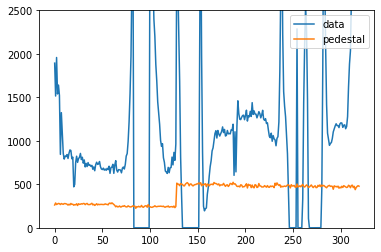

board: 15, evt: 302, TS: 736691998


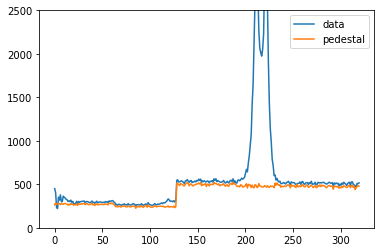

board: 15, evt: 771, TS: 1875836439


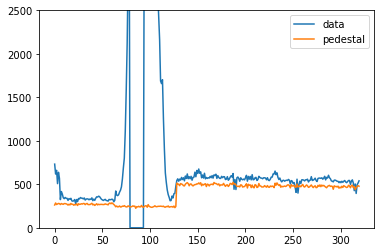

board: 15, evt: 932, TS: 2214599309


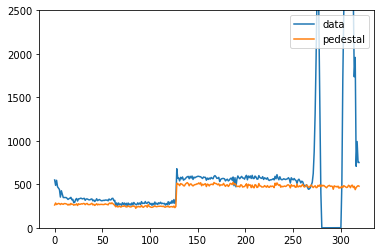

board: 15, evt: 1046, TS: 2476874109


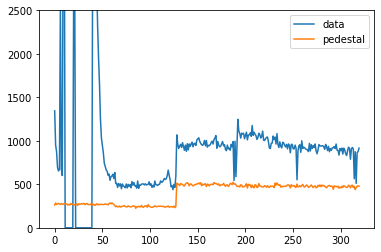

In [17]:
for b in [3, 6, 9, 12, 15]:
    board = test.board_data(b)
    for evt in range(test.nevents_per_board(b)):
        if np.any(board[evt]-pedestal[b] > 300):
            plt.plot(np.arange(320), board[evt], label='data')
            plt.plot(np.arange(320), pedestal[b], label='pedestal')
            print('board: {}, evt: {}, TS: {}'.format(b, evt, test.header_board(b)[evt][2]))
            plt.ylim(0,2500)
            plt.legend(loc='upper right')
            plt.show()

board: 16, evt: 4, TS: 30981944


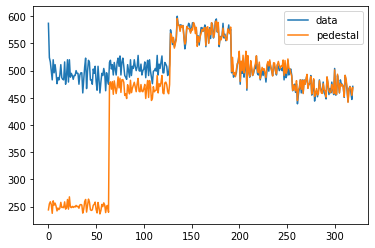

board: 16, evt: 255, TS: 627620074


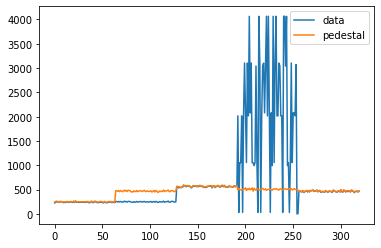

board: 16, evt: 511, TS: 1295290248


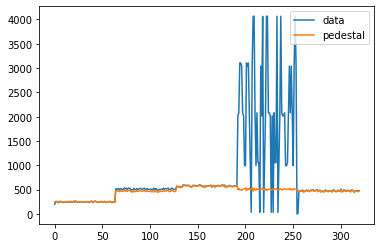

board: 16, evt: 767, TS: 1869459348


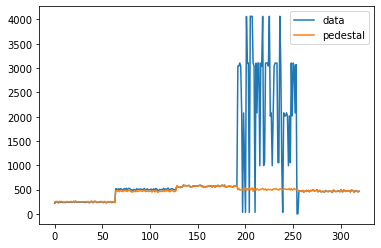

board: 16, evt: 1023, TS: 2439749276


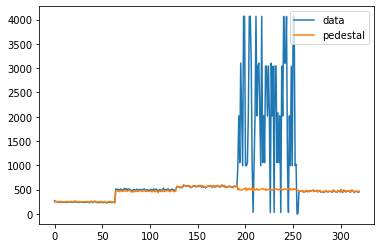

board: 19, evt: 283, TS: 677725544


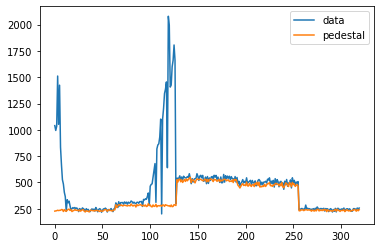

board: 22, evt: 153, TS: 339786456


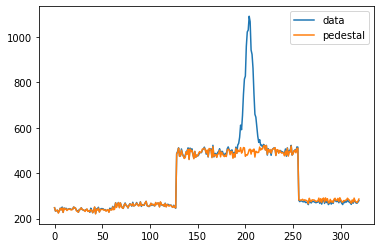

board: 22, evt: 1200, TS: 2818562483


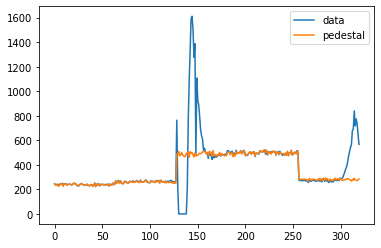

board: 25, evt: 16, TS: 41027330


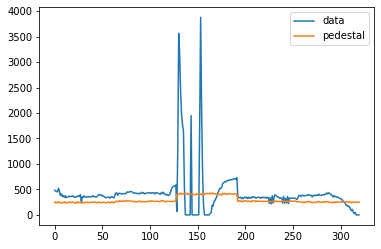

board: 25, evt: 33, TS: 79992539


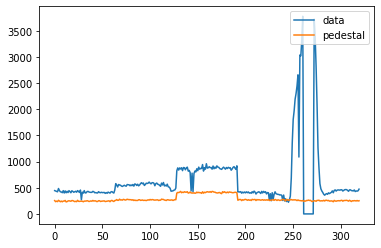

board: 25, evt: 120, TS: 265742118


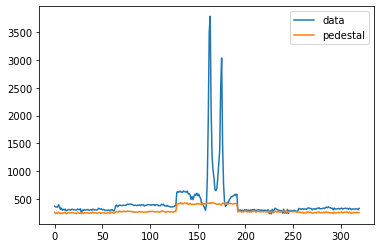

board: 25, evt: 183, TS: 409553795


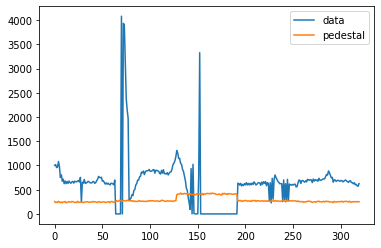

board: 25, evt: 444, TS: 1136423074


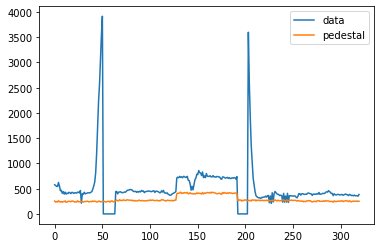

board: 25, evt: 462, TS: 1173184714


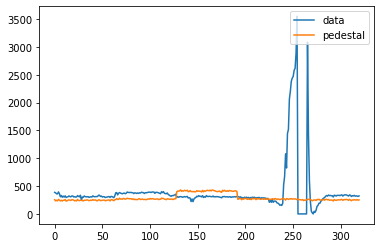

board: 25, evt: 647, TS: 1600784070


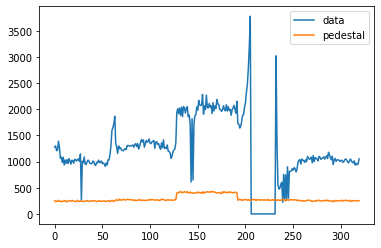

board: 25, evt: 875, TS: 2069972717


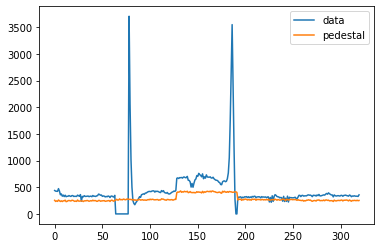

board: 25, evt: 932, TS: 2199069302


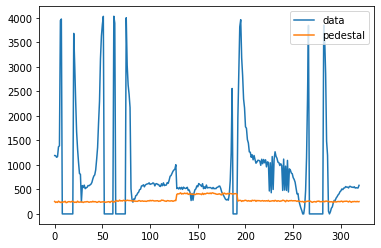

board: 28, evt: 199, TS: 477023212


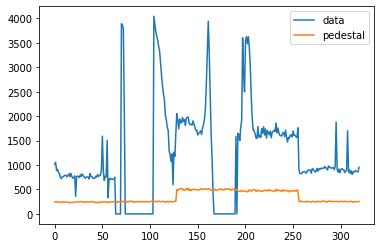

board: 28, evt: 205, TS: 487538224


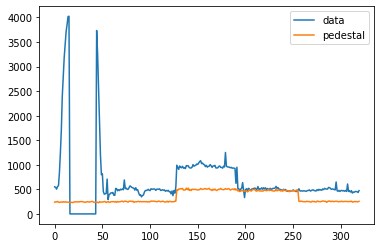

board: 28, evt: 268, TS: 637218251


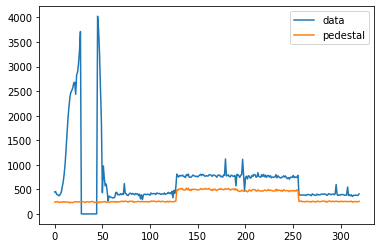

board: 28, evt: 659, TS: 1631800267


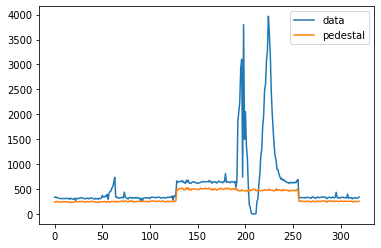

board: 28, evt: 701, TS: 1697043473


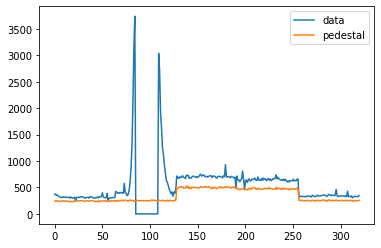

board: 28, evt: 854, TS: 2027704317


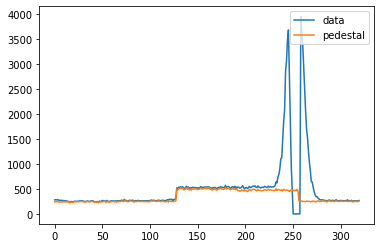

board: 28, evt: 930, TS: 2190048149


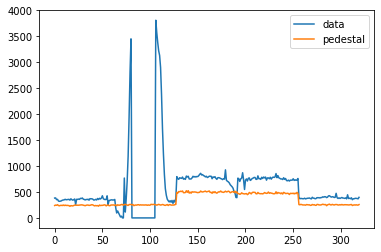

board: 28, evt: 932, TS: 2194344162


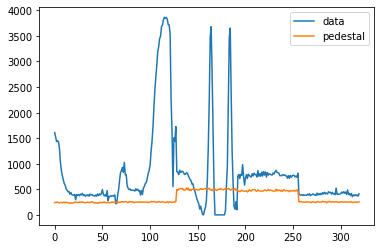

board: 28, evt: 1020, TS: 2407600608


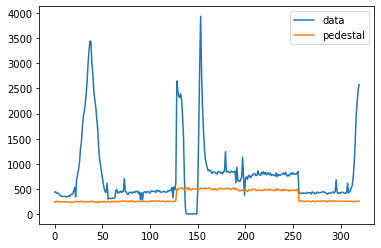

board: 28, evt: 1090, TS: 2557959915


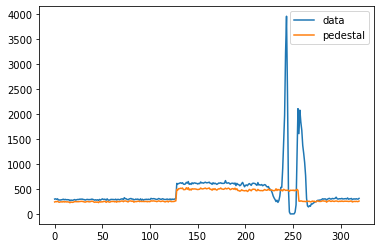

board: 28, evt: 1136, TS: 2687671319


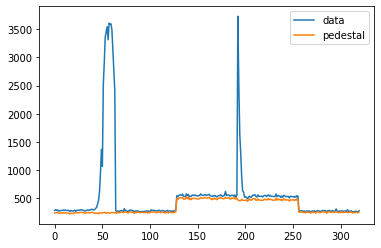

board: 28, evt: 1155, TS: 2721758919


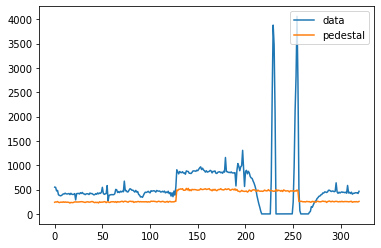

board: 28, evt: 1167, TS: 2744664961


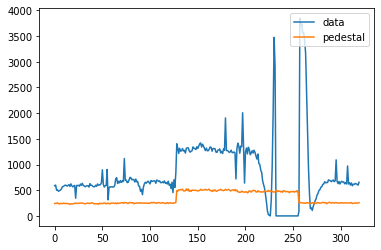

In [18]:
for b in [16, 19, 22, 25, 28]:
    board = test.board_data(b)
    for evt in range(test.nevents_per_board(b)):
        if np.any(board[evt]-pedestal[b] > 300):
            plt.plot(np.arange(320), board[evt], label='data')
            plt.plot(np.arange(320), pedestal[b], label='pedestal')
            print('board: {}, evt: {}, TS: {}'.format(b, evt, test.header_board(b)[evt][2]))
            #plt.ylim(0,2500)
            plt.legend(loc='upper right')
            plt.show()

---